# Model Development
The goal in this notebook is to use the preprocessing and data cleaning used prior to estimate base forecasts, as well as the various aggregated forecasts (by warehouse, country, L-category, product_id).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import utils as u

## Independent unique_id forecasts

In [2]:
df = u.get_train(weighted=False)

In [5]:
unique_ids = df['unique_id'].unique()
print(unique_ids)

[5328 2094 3155 ... 5368 5366 1836]


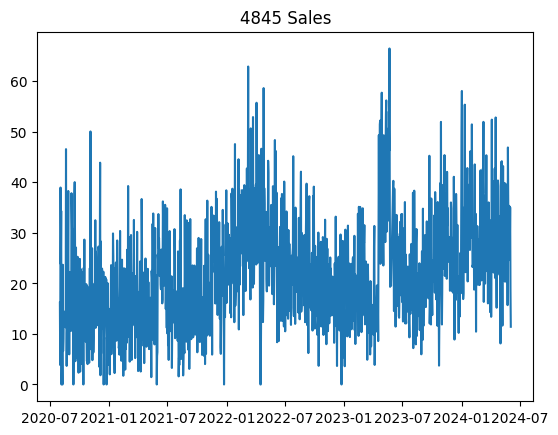

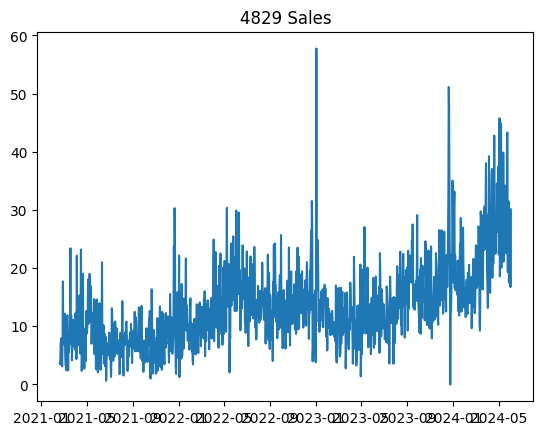

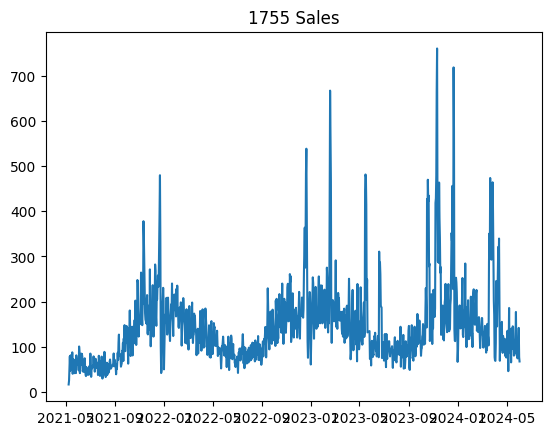

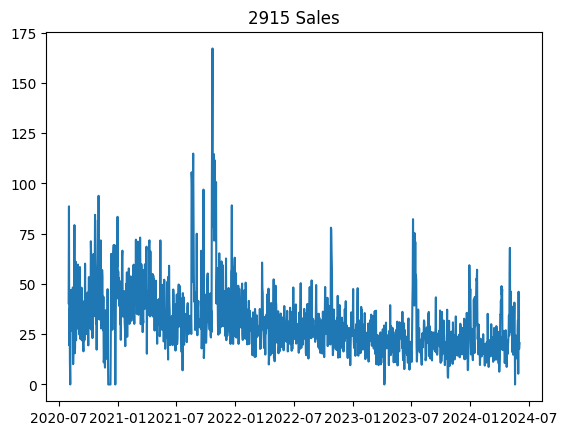

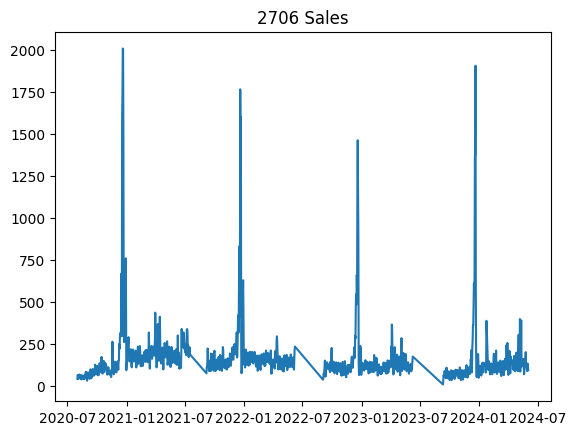

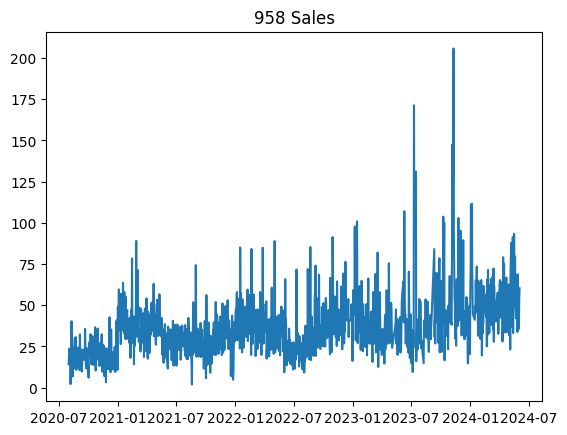

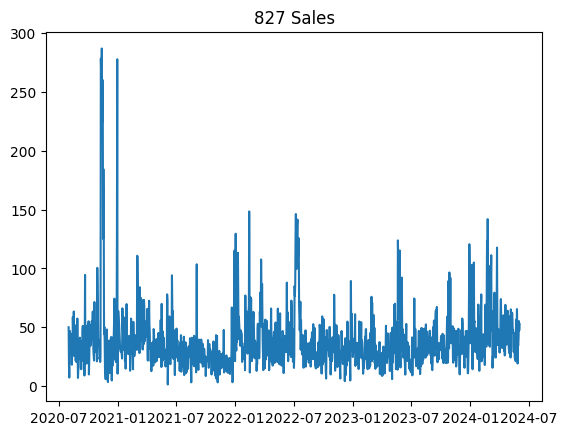

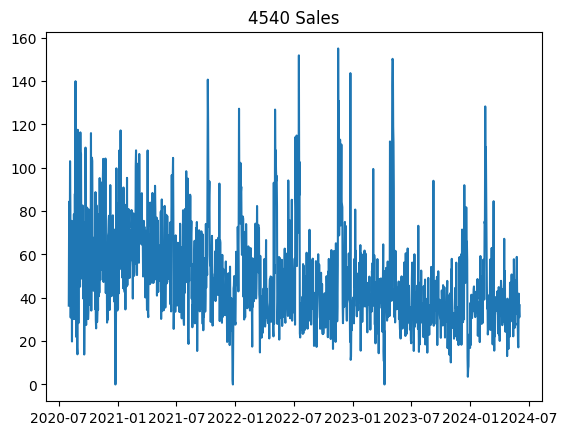

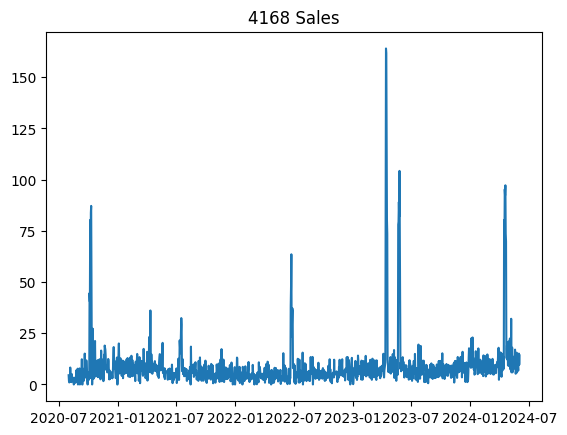

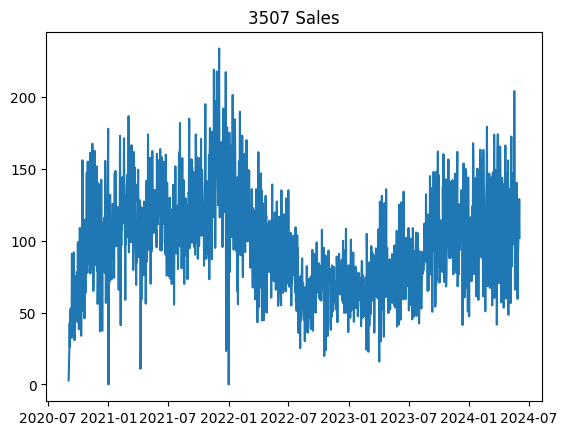

In [4]:
df = df.sort_values('date')
for id in unique_ids[:10]:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales']]
    plt.plot(df_id['date'], df_id['sales'])
    plt.title(f'{id} Sales')
    plt.show()

In [5]:
cal = u.get_calendar()
cal = cal.sort_values('date')
cal.loc[:,'holiday_name'] = cal['holiday_name'].fillna('No Holiday')
cal.head()

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,events
7260,2016-01-01,New Years Day,1,1,0,0,Prague_2,2
9914,2016-01-01,New Years Day,1,1,0,0,Budapest_1,2
22413,2016-01-01,New Years Day,1,1,0,0,Munich_1,2
22407,2016-01-01,New Years Day,1,1,0,0,Prague_1,2
9911,2016-01-01,New Years Day,1,1,0,0,Frankfurt_1,2


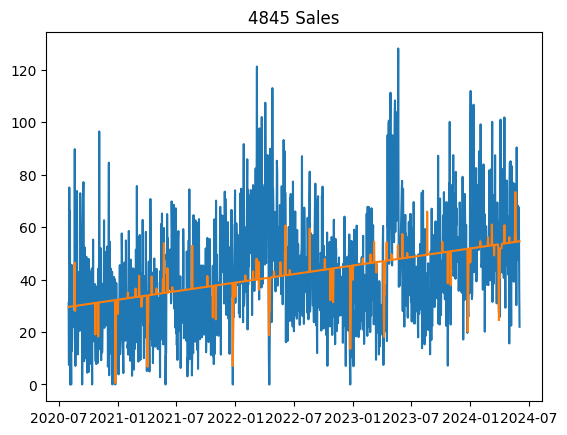

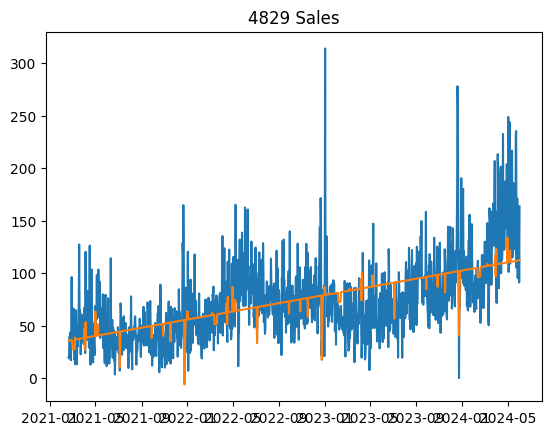

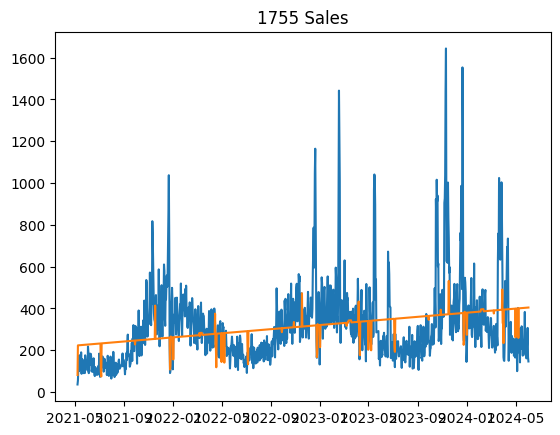

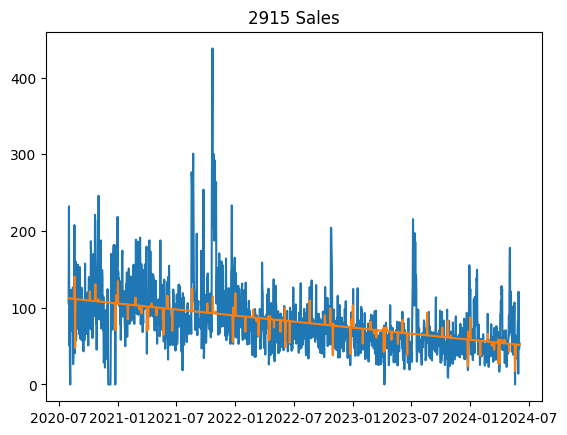

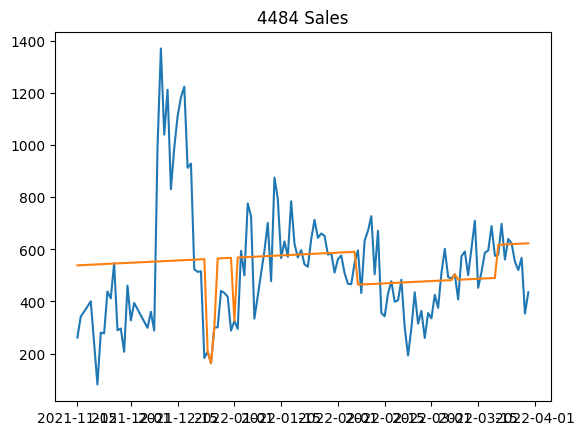

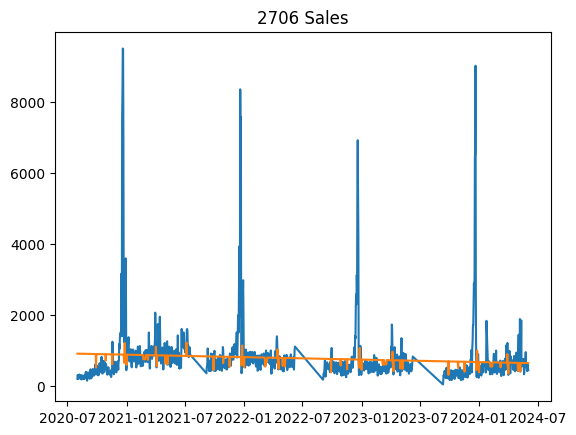

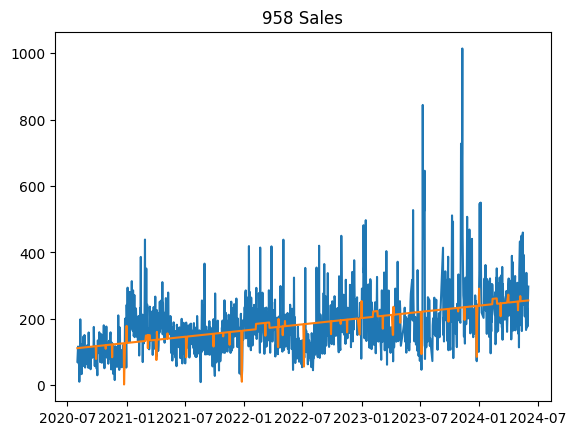

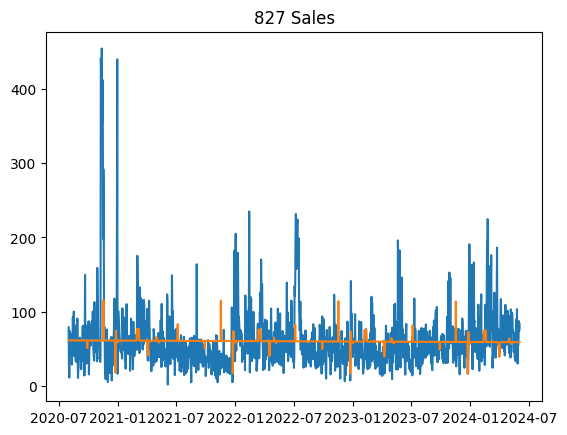

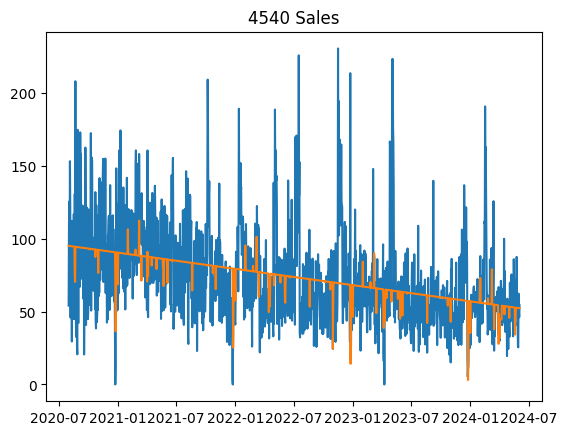

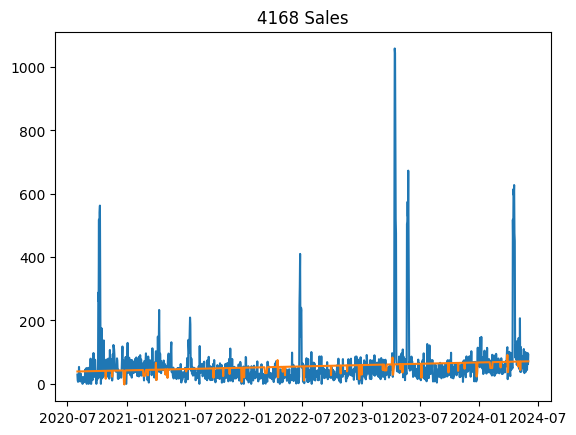

In [6]:
from sklearn.linear_model import LinearRegression
for id in unique_ids[:10]:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales', 'warehouse']]
    house = df_id.loc[df_id.index[0], 'warehouse']
    df_id = df_id.drop('warehouse', axis=1)
    cal_house = cal.loc[cal['warehouse'] == house].drop('warehouse', axis=1)
    combined = df_id.merge(cal_house, how='left', on='date')
    processed = pd.concat([combined.drop('holiday_name', axis=1),
                           pd.get_dummies(combined['holiday_name']).drop('No Holiday', axis=1).astype(int)],
                           axis=1)
    processed['date'] = processed['date'].astype(int) / 1e11
    X = processed.drop('sales', axis=1)
    y = processed['sales']
    plt.plot(df_id['date'], df_id['sales'])
    linear = LinearRegression().fit(X, y)
    plt.plot(df_id['date'], linear.predict(X))
    plt.title(f'{id} Sales')
    plt.show()

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events',
       '1848 Revolution Memorial Day (Extra holiday)', '1st Christmas Day',
       '2nd Christmas Day', 'All Saints Day', 'All Saints' Day Holiday',
       'Christmas Eve', 'Day of National Unity', 'Easter Monday',
       'Good Friday', 'Hungary National Day Holiday',
       'Independent Hungary Day', 'International womens day', 'Labour Day',
       'Memorial Day for the Martyrs of Arad',
       'Memorial Day for the Victims of the Communist Dictatorships',
       'Memorial Day for the Victims of the Holocaust',
       'Memorial Day of the Republic', 'Memorial day of the 1956 Revolution',
       'National Defense Day', 'New Years Day', 'State Foundation Day',
       'Whit monday', 'Whit sunday', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6'],
      dtype='object')


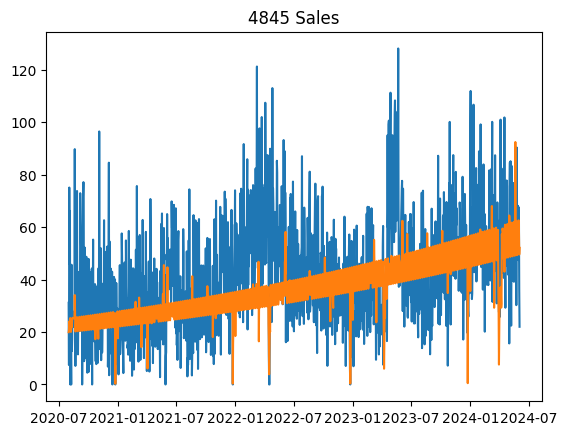

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


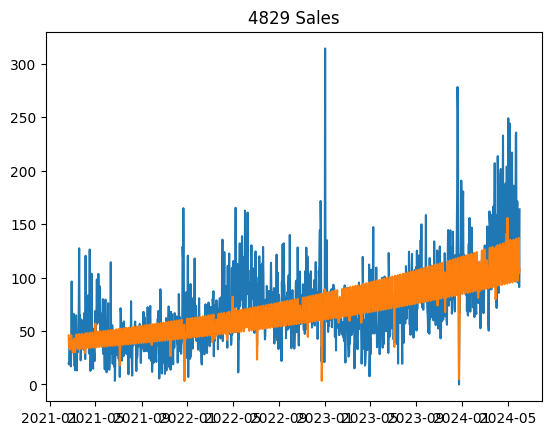

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


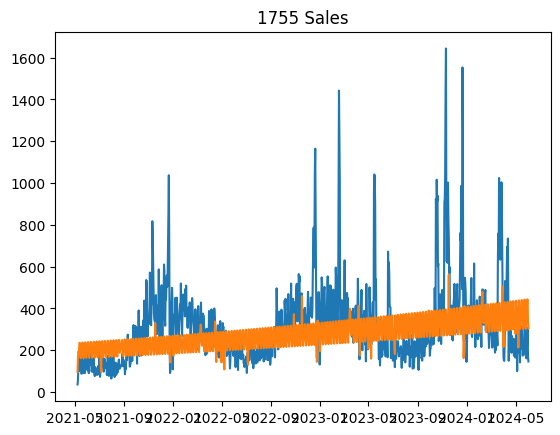

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events',
       '1848 Revolution Memorial Day (Extra holiday)', '1st Christmas Day',
       '2nd Christmas Day', 'All Saints Day', 'All Saints' Day Holiday',
       'Christmas Eve', 'Day of National Unity', 'Easter Monday',
       'Good Friday', 'Hungary National Day Holiday',
       'Independent Hungary Day', 'International womens day', 'Labour Day',
       'Memorial Day for the Martyrs of Arad',
       'Memorial Day for the Victims of the Communist Dictatorships',
       'Memorial Day for the Victims of the Holocaust',
       'Memorial Day of the Republic', 'Memorial day of the 1956 Revolution',
       'National Defense Day', 'New Years Day', 'State Foundation Day',
       'Whit monday', 'Whit sunday', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6'],
      dtype='object')


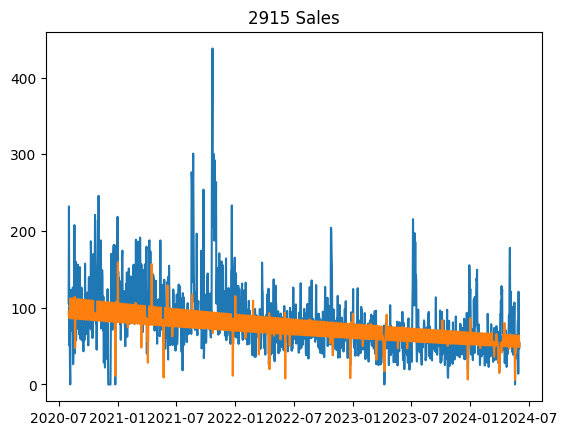

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'International womens day', 'New Years Day',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6'],
      dtype='object')


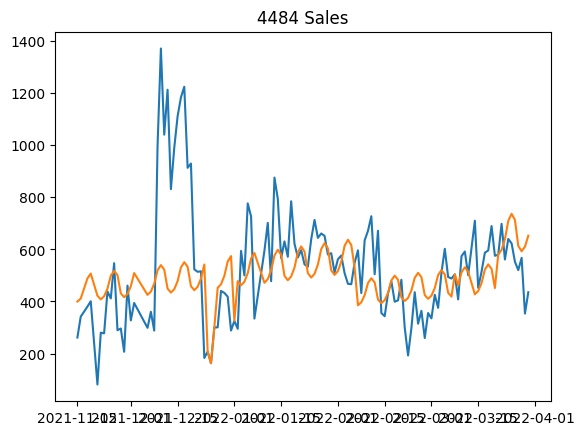

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


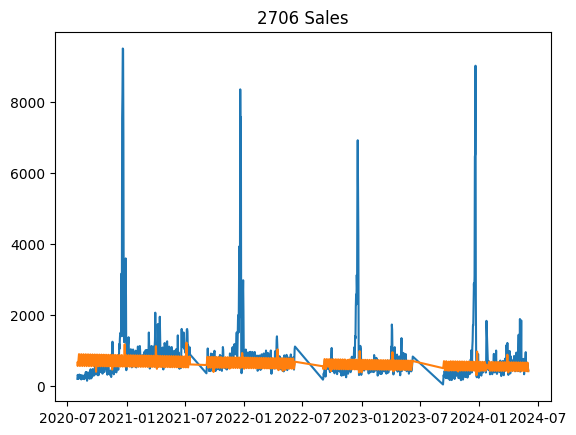

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


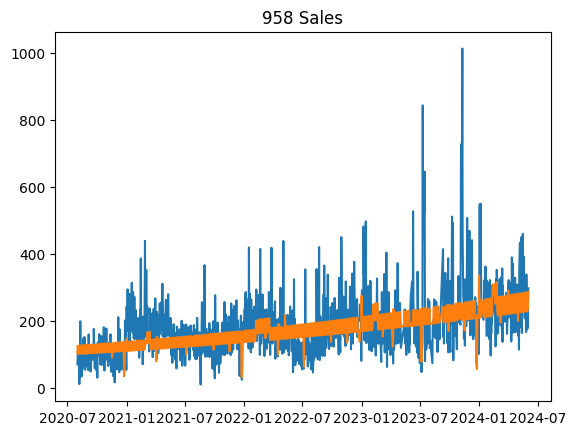

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


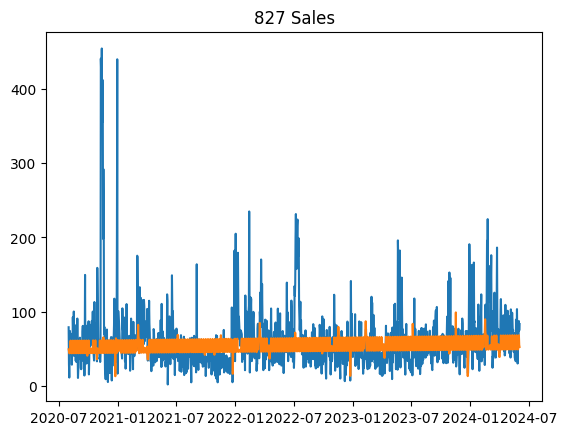

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events',
       '1848 Revolution Memorial Day (Extra holiday)', '1st Christmas Day',
       '2nd Christmas Day', 'All Saints Day', 'All Saints' Day Holiday',
       'Christmas Eve', 'Day of National Unity', 'Easter Monday',
       'Good Friday', 'Hungary National Day Holiday',
       'Independent Hungary Day', 'International womens day', 'Labour Day',
       'Memorial Day for the Martyrs of Arad',
       'Memorial Day for the Victims of the Communist Dictatorships',
       'Memorial Day for the Victims of the Holocaust',
       'Memorial Day of the Republic', 'Memorial day of the 1956 Revolution',
       'National Defense Day', 'New Years Day', 'State Foundation Day',
       'Whit monday', 'Whit sunday', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6'],
      dtype='object')


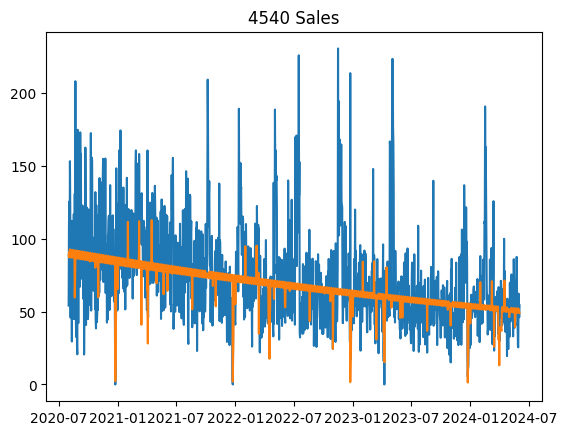

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


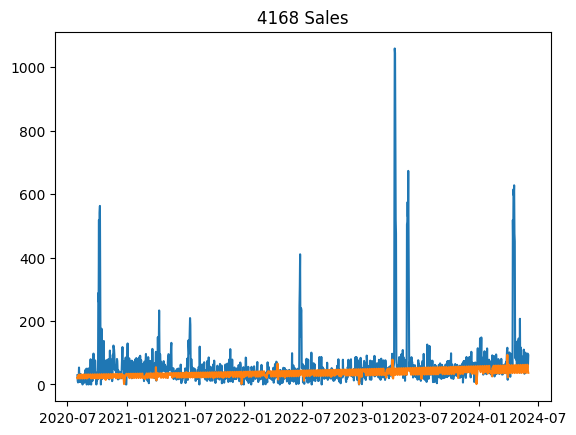

In [7]:
eps = 0.1
for id in unique_ids[:10]:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales', 'warehouse']]
    df_id['sales'] = df_id['sales'].apply(lambda x: np.log(eps + x))
    house = df_id.loc[df_id.index[0], 'warehouse']
    df_id = df_id.drop('warehouse', axis=1)
    cal_house = cal.loc[cal['warehouse'] == house].drop('warehouse', axis=1)
    combined = df_id.merge(cal_house, how='left', on='date')
    processed = pd.concat([combined.drop('holiday_name', axis=1),
                           pd.get_dummies(combined['holiday_name']).drop('No Holiday', axis=1).astype(int)],
                           axis=1)
    processed['weekday'] = [day.weekday() for day in processed['date']]
    processed = pd.concat([processed.drop('weekday', axis=1),
                           pd.get_dummies(processed['weekday'], prefix='Weekday').drop('Weekday_0', axis=1).astype(int)],
                           axis=1)
    print(processed.columns)
    processed['date'] = processed['date'].astype(int) / 1e11
    X = processed.drop('sales', axis=1)
    y = processed['sales']
    plt.plot(df_id['date'], np.exp(df_id['sales']) - eps)
    linear = LinearRegression().fit(X, y)
    plt.plot(df_id['date'], np.exp(linear.predict(X)) - eps)
    plt.title(f'{id} Sales')
    plt.show()

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events',
       '1848 Revolution Memorial Day (Extra holiday)', '1st Christmas Day',
       '2nd Christmas Day', 'All Saints Day', 'All Saints' Day Holiday',
       'Christmas Eve', 'Day of National Unity', 'Easter Monday',
       'Good Friday', 'Hungary National Day Holiday',
       'Independent Hungary Day', 'International womens day', 'Labour Day',
       'Memorial Day for the Martyrs of Arad',
       'Memorial Day for the Victims of the Communist Dictatorships',
       'Memorial Day for the Victims of the Holocaust',
       'Memorial Day of the Republic', 'Memorial day of the 1956 Revolution',
       'National Defense Day', 'New Years Day', 'State Foundation Day',
       'Whit monday', 'Whit sunday', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6'],
      dtype='object')


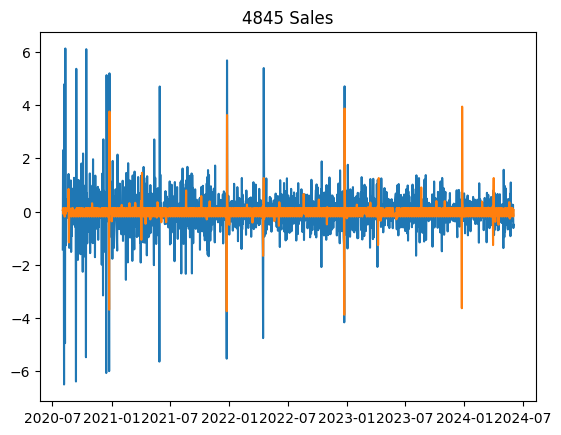

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


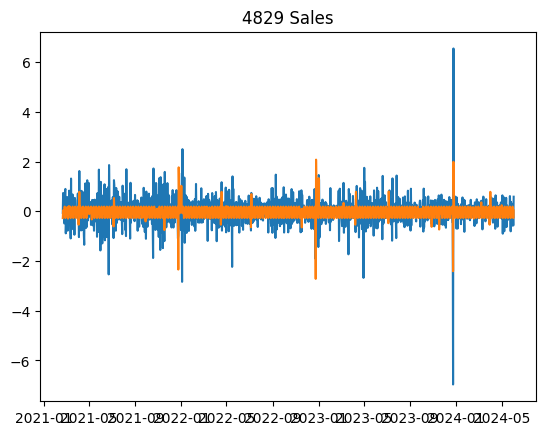

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


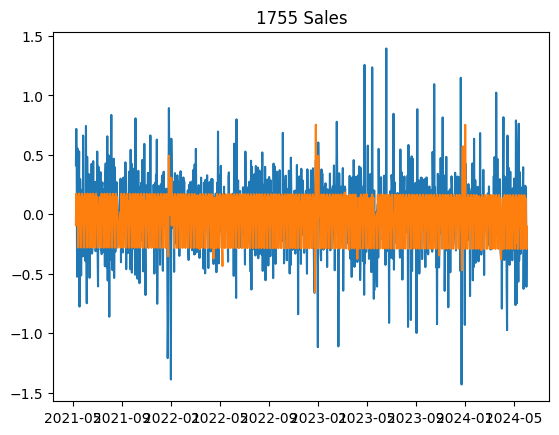

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events',
       '1848 Revolution Memorial Day (Extra holiday)', '1st Christmas Day',
       '2nd Christmas Day', 'All Saints Day', 'All Saints' Day Holiday',
       'Christmas Eve', 'Day of National Unity', 'Easter Monday',
       'Good Friday', 'Hungary National Day Holiday',
       'Independent Hungary Day', 'International womens day', 'Labour Day',
       'Memorial Day for the Martyrs of Arad',
       'Memorial Day for the Victims of the Communist Dictatorships',
       'Memorial Day for the Victims of the Holocaust',
       'Memorial Day of the Republic', 'Memorial day of the 1956 Revolution',
       'National Defense Day', 'New Years Day', 'State Foundation Day',
       'Whit monday', 'Whit sunday', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6'],
      dtype='object')


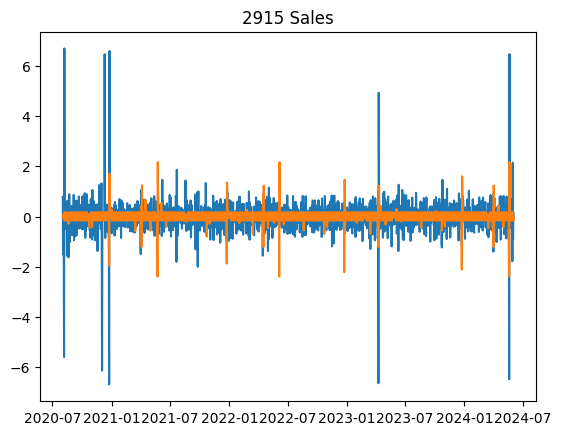

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'International womens day', 'New Years Day',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6'],
      dtype='object')


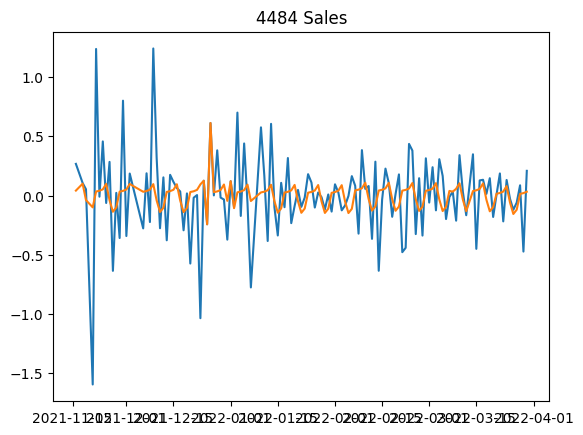

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


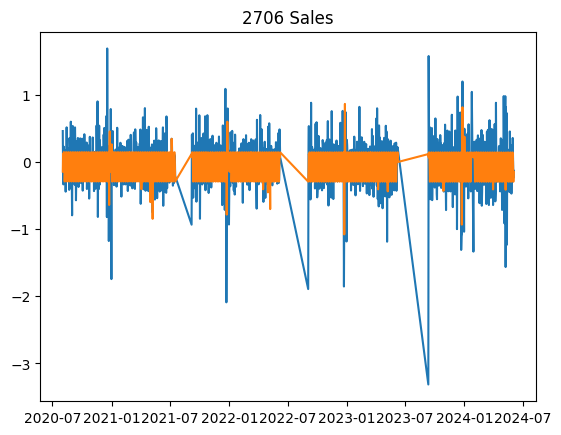

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


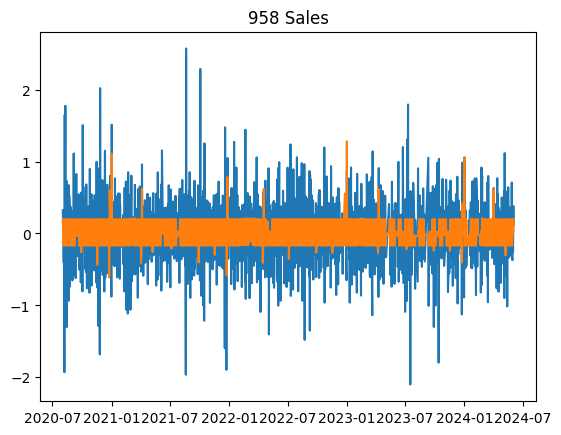

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


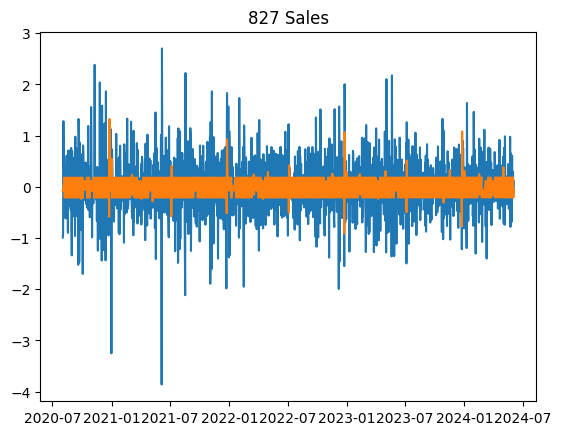

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events',
       '1848 Revolution Memorial Day (Extra holiday)', '1st Christmas Day',
       '2nd Christmas Day', 'All Saints Day', 'All Saints' Day Holiday',
       'Christmas Eve', 'Day of National Unity', 'Easter Monday',
       'Good Friday', 'Hungary National Day Holiday',
       'Independent Hungary Day', 'International womens day', 'Labour Day',
       'Memorial Day for the Martyrs of Arad',
       'Memorial Day for the Victims of the Communist Dictatorships',
       'Memorial Day for the Victims of the Holocaust',
       'Memorial Day of the Republic', 'Memorial day of the 1956 Revolution',
       'National Defense Day', 'New Years Day', 'State Foundation Day',
       'Whit monday', 'Whit sunday', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6'],
      dtype='object')


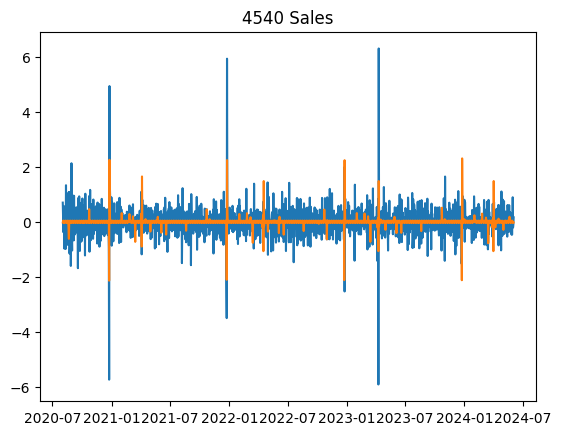

Index(['date', 'sales', 'holiday', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'events', '1st Christmas Day', '2nd Christmas Day',
       'Christmas Eve', 'Cyrila a Metodej', 'Den boje za svobodu a demokracii',
       'Den ceske statnosti', 'Den osvobozeni',
       'Den vzniku samostatneho ceskoslovenskeho statu', 'Easter Monday',
       'Good Friday', 'International womens day', 'Jan Hus', 'Labour Day',
       'New Years Day', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')


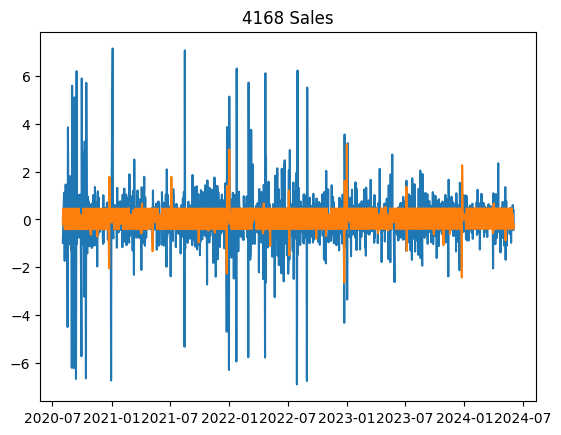

In [8]:
eps = 0.1
for id in unique_ids[:10]:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales', 'warehouse']]
    df_id['sales'] = df_id['sales'].apply(lambda x: np.log(eps + x)).diff() # differenced
    df_id = df_id.dropna()
    house = df_id.loc[df_id.index[0], 'warehouse']
    df_id = df_id.drop('warehouse', axis=1)
    cal_house = cal.loc[cal['warehouse'] == house].drop('warehouse', axis=1)
    combined = df_id.merge(cal_house, how='left', on='date')
    processed = pd.concat([combined.drop('holiday_name', axis=1),
                           pd.get_dummies(combined['holiday_name']).drop('No Holiday', axis=1).astype(int)],
                          axis=1)
    processed['weekday'] = [day.weekday() for day in processed['date']]
    processed = pd.concat([processed.drop('weekday', axis=1),
                           pd.get_dummies(processed['weekday'], prefix='Weekday').drop('Weekday_0', axis=1).astype(int)],
                          axis=1)
    print(processed.columns)
    processed['date'] = processed['date'].astype(int) / 1e11
    X = processed.drop('sales', axis=1)
    y = processed['sales']
    plt.plot(df_id['date'], df_id['sales'])
    linear = LinearRegression().fit(X, y)
    plt.plot(df_id['date'], linear.predict(X))
    plt.title(f'{id} Sales')
    plt.show()

## Statistical Modeling
SARIMAX, PACF, etc.

In [9]:
from statsmodels.tsa.stattools import adfuller

for id in unique_ids[:10]:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales']]
    adf = adfuller(df_id['sales'])
    p_threshold = 0.001
    print(f'Unique ID: {id:4}, p-value of stationarity: {adf[1]:.5f}, Stationary: {adf[1] < p_threshold}')

Unique ID: 4845, p-value of stationarity: 0.00313, Stationary: False
Unique ID: 4829, p-value of stationarity: 0.78233, Stationary: False
Unique ID: 1755, p-value of stationarity: 0.00497, Stationary: False
Unique ID: 2915, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 4484, p-value of stationarity: 0.00018, Stationary: True
Unique ID: 2706, p-value of stationarity: 0.00000, Stationary: True
Unique ID:  958, p-value of stationarity: 0.00224, Stationary: False
Unique ID:  827, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 4540, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 4168, p-value of stationarity: 0.00000, Stationary: True


Without differencing or log-transforming, many of the ids already have highly stationary sales. Since the metric is a function sales and not log-sales, we're better off sticking to the normal scale. However, since we're going to use the `date` column in a linear model, we should check the stationarity of the differenced columns instead. We'll use a p-value threshold of 0.001 just to be extra safe.

In [10]:
for id in unique_ids[:10]:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales']]
    adf = adfuller(df_id['sales'].diff().dropna())
    p_threshold = 0.001
    print(f'Unique ID: {id:4}, p-value of stationarity: {adf[1]:.5f}, Stationary: {adf[1] < p_threshold}')

Unique ID: 4845, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 4829, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 1755, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 2915, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 4484, p-value of stationarity: 0.00087, Stationary: True
Unique ID: 2706, p-value of stationarity: 0.00000, Stationary: True
Unique ID:  958, p-value of stationarity: 0.00000, Stationary: True
Unique ID:  827, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 4540, p-value of stationarity: 0.00000, Stationary: True
Unique ID: 4168, p-value of stationarity: 0.00000, Stationary: True


In [11]:
from tqdm import tqdm
stationary_ids = []
nonstationary_ids = []
p_threshold = 0.001
for id in tqdm(unique_ids):
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales']].diff().dropna() # differenced
    if df_id['sales'].min() == df_id['sales'].max():
        print(f'{id} has constant sales.')
        nonstationary_ids.append(id)
    elif adfuller(df_id['sales'])[1] < p_threshold:
        stationary_ids.append(id)
    else:
        nonstationary_ids.append(id)

  0%|          | 0/5390 [00:00<?, ?it/s]

 90%|████████▉ | 4850/5390 [04:41<00:17, 30.90it/s]

2802 has constant sales.


100%|██████████| 5390/5390 [05:00<00:00, 17.92it/s]


In [12]:
print(f'# (After Differencing) Stationary IDs:    {len(stationary_ids)}')
print(f'# (After Differencing) Nonstationary IDs: {len(nonstationary_ids)}')

# (After Differencing) Stationary IDs:    5169
# (After Differencing) Nonstationary IDs: 221


There are still 221 nonstationary IDs. Let's see how many of these we're required to forecast.

In [13]:
test_ids = pd.read_csv('data/sales_test.csv')['unique_id'].unique()
nonstationary_and_forecast_ids = [id for id in nonstationary_ids if id in test_ids]
print(f'# Nonstationary IDs in Test Set: {len(nonstationary_and_forecast_ids)}')

# Nonstationary IDs in Test Set: 31


Nice. So, there are only 31 products whose sales are non-stationary after differencing for which we're required to generate forecasts. We chose a very safe p-threshold, so let's see how bad these p-values really are.

In [14]:
for id in nonstationary_and_forecast_ids:
    df_id = df.loc[df['unique_id'] == id, [
        'date', 'sales']].diff().dropna()  # differenced
    if df_id['sales'].min() == df_id['sales'].max():
        print(f'{id} has constant sales.')
    else: 
        print(f"{id:4} ADF p-value: {adfuller(df_id['sales'])[1]: .4f}, Length of Series: {len(df_id)}")

3928 ADF p-value:  0.0090, Length of Series: 173
2209 ADF p-value:  0.0682, Length of Series: 31
2463 ADF p-value:  0.0031, Length of Series: 109
3621 ADF p-value:  0.0067, Length of Series: 217
1316 ADF p-value:  0.0035, Length of Series: 84
4445 ADF p-value:  0.0167, Length of Series: 141
2165 ADF p-value:  0.0013, Length of Series: 32
 930 ADF p-value:  0.6747, Length of Series: 43
5365 ADF p-value:  0.0026, Length of Series: 23
1720 ADF p-value:  0.0844, Length of Series: 67
2753 ADF p-value:  0.9889, Length of Series: 25
1802 ADF p-value:  0.1478, Length of Series: 76
 521 ADF p-value:  0.0449, Length of Series: 81
 362 ADF p-value:  0.0067, Length of Series: 46
1347 ADF p-value:  0.1294, Length of Series: 55
1745 ADF p-value:  0.0414, Length of Series: 38
2210 ADF p-value:  0.0608, Length of Series: 40
1345 ADF p-value:  0.0106, Length of Series: 55
4747 ADF p-value:  0.8418, Length of Series: 18
3001 ADF p-value:  0.9833, Length of Series: 30
4597 ADF p-value:  0.0064, Length of

Some p-values are decent on their own, but remember, we have thousands of unique ids, so a smaller p-value is necessary for filtering. And as expected, the data history for these unique_ids is very small relative to the mean (~700). Let's move on for now with our stationary series.

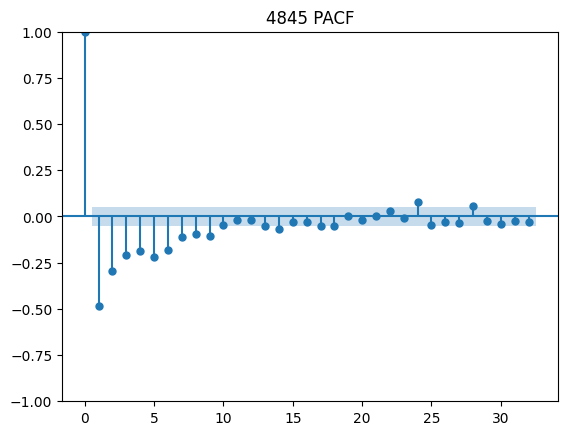

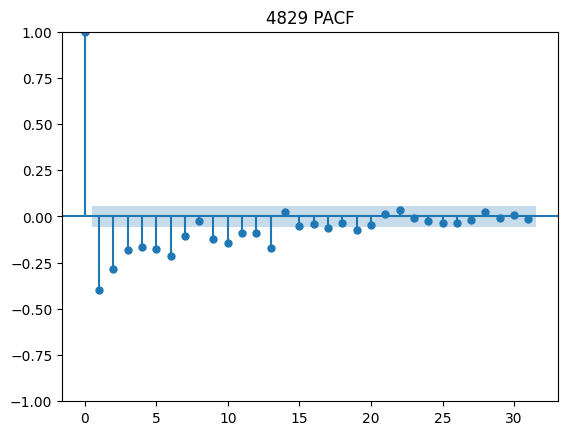

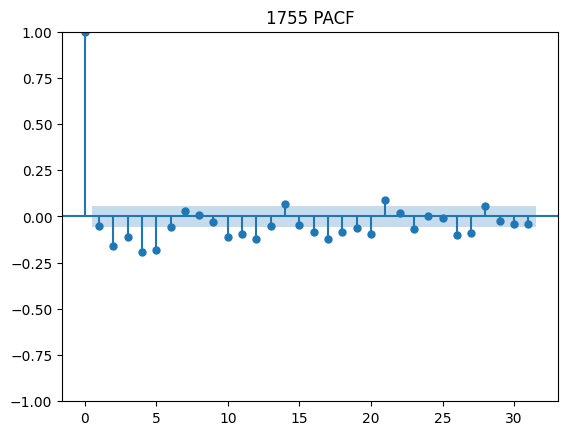

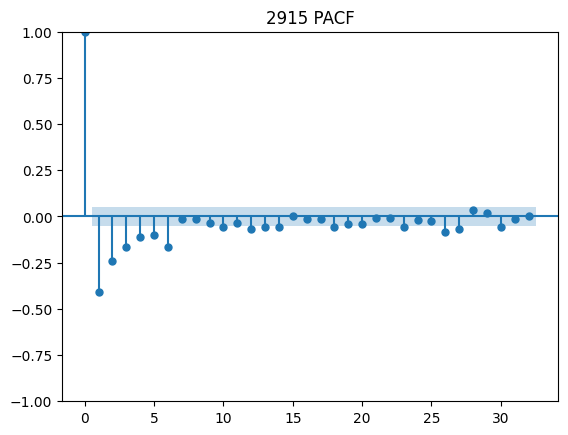

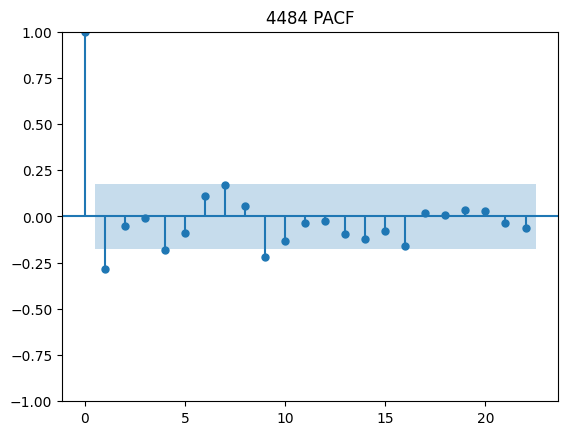

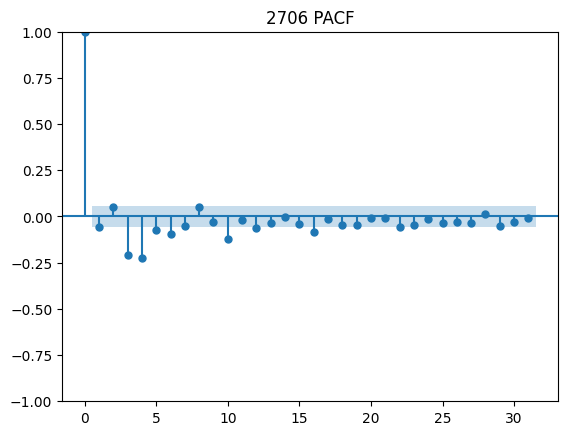

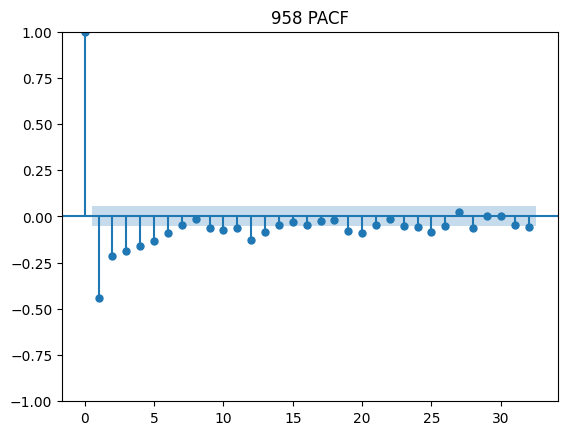

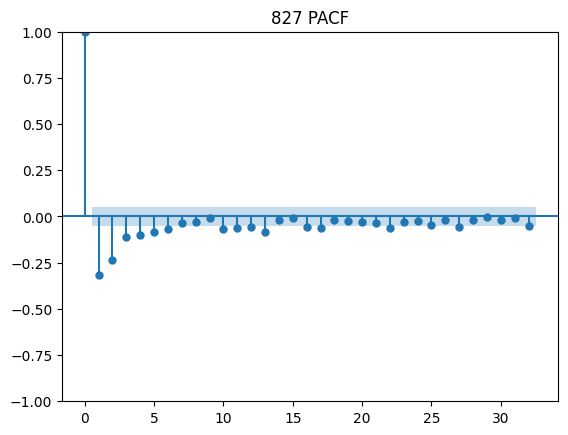

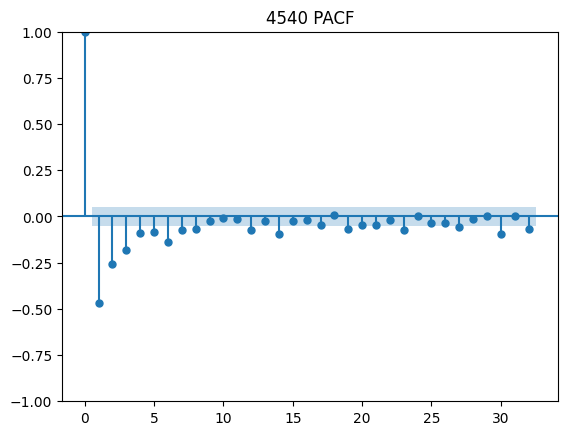

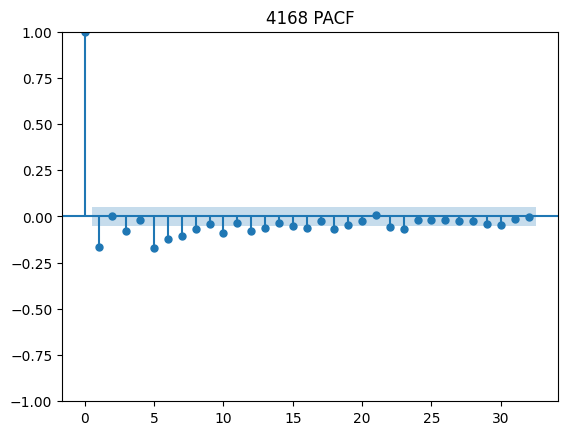

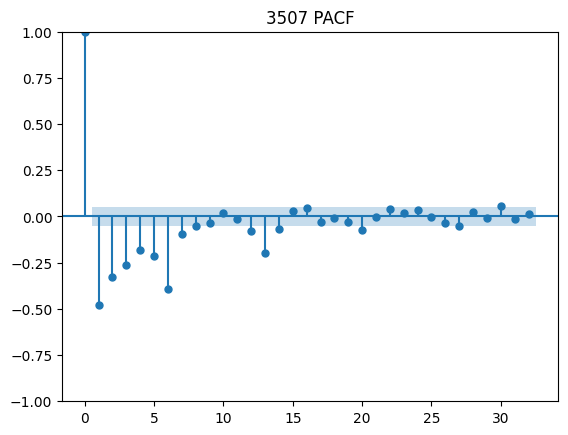

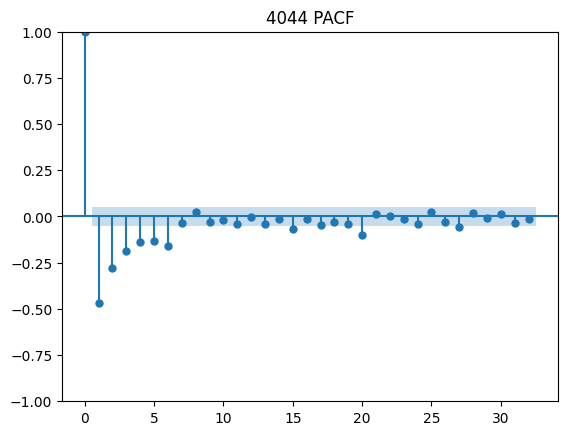

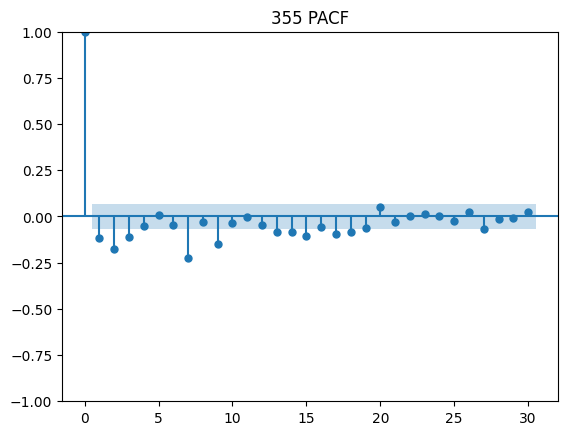

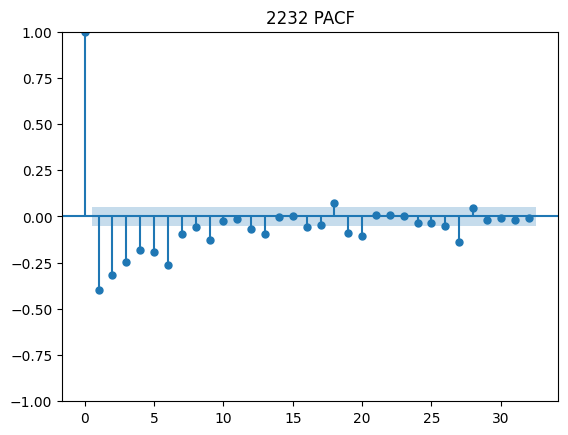

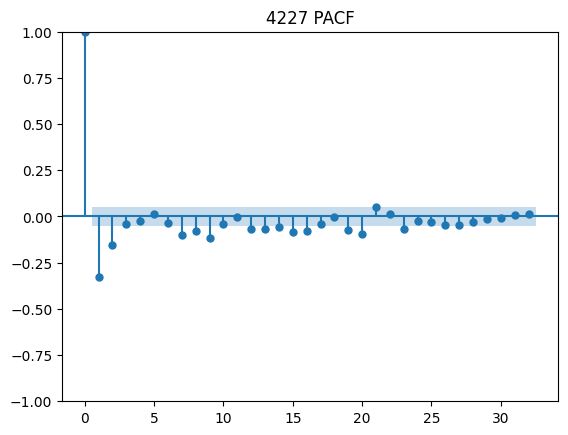

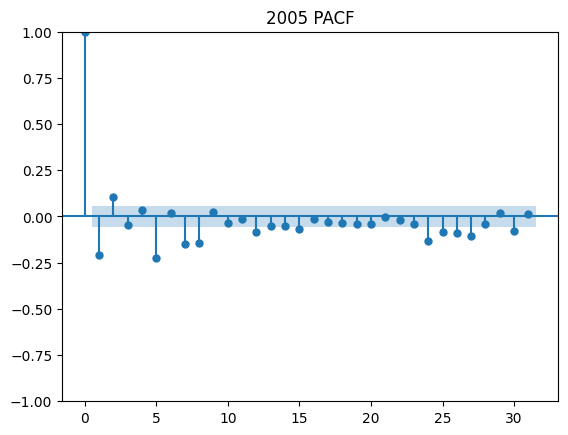

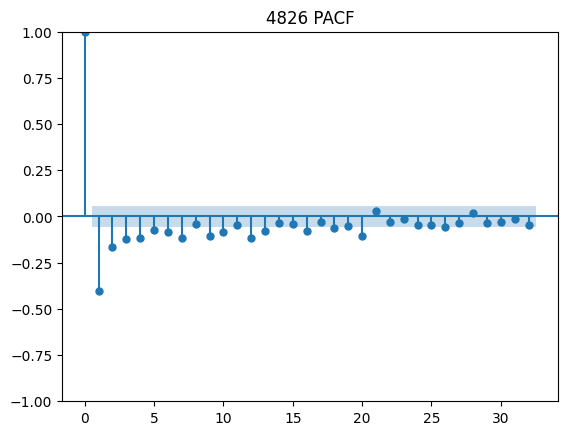

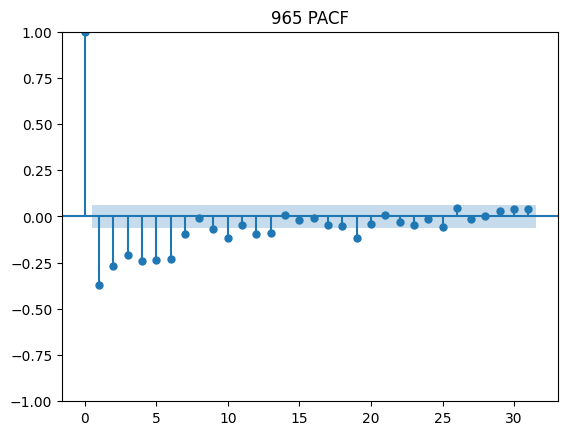

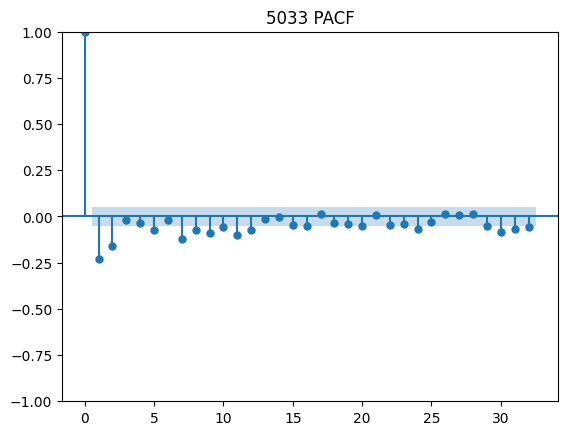

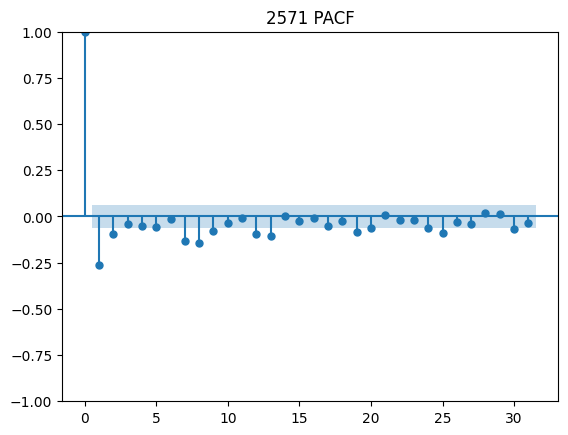

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

for id in stationary_ids[:20]:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales']].diff().dropna() # differenced
    plot_pacf(df_id['sales'])
    plt.title(f'{id} PACF')
    plt.show()

We see that the PACF plots look very product-dependent. We will work out a workflow that can automate model selection.

In [16]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import pacf
import warnings
warnings.filterwarnings('ignore')

sig_lags_dict = {}

for id in stationary_ids:
    df_id = df.loc[df['unique_id'] == id, ['date', 'sales']].diff().dropna() # differenced
    pac, conf = pacf(df_id['sales'], alpha=0.05)
    sig_lags = []
    for lag, (pcor, (min, max)) in enumerate(zip(pac, conf)):
        if lag == 0:
            continue
        if not (min < 0 and max > 0):
            sig_lags.append(lag)
    sig_lags_dict[id] = sig_lags

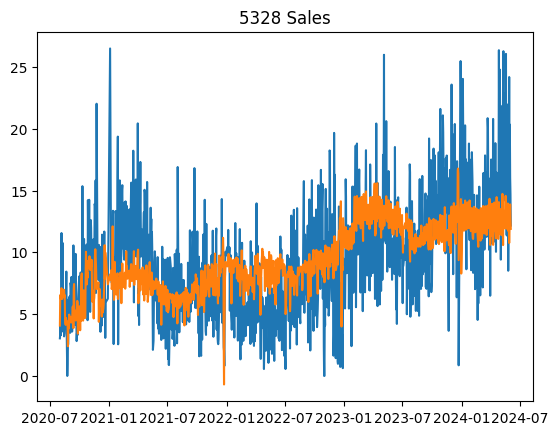

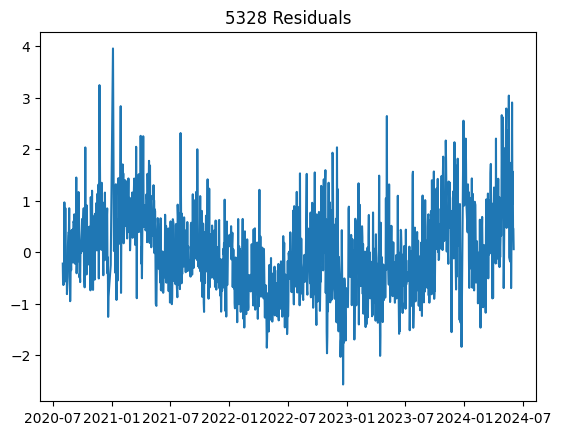

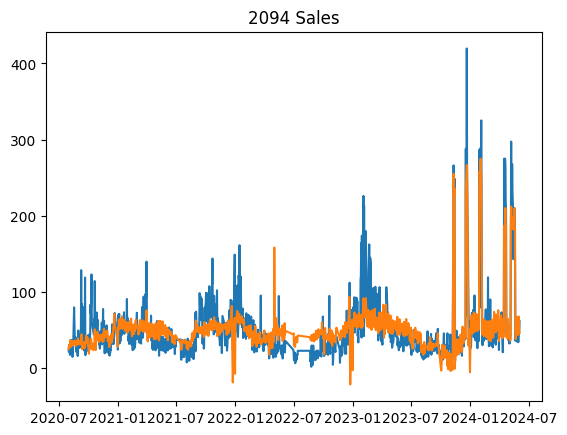

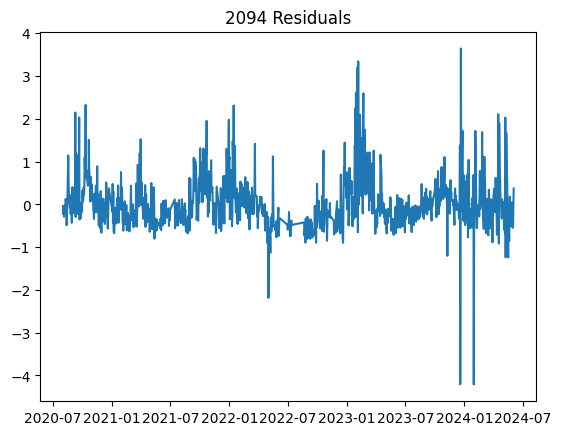

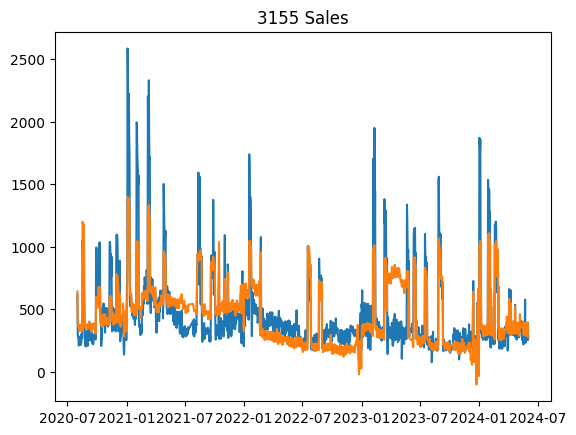

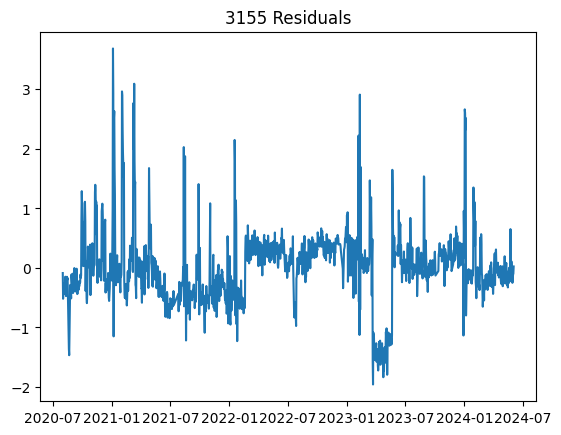

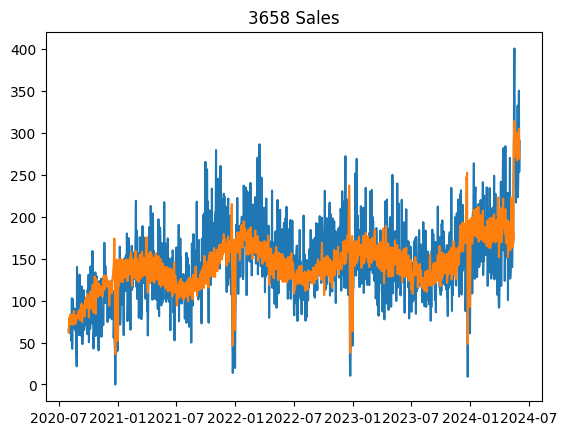

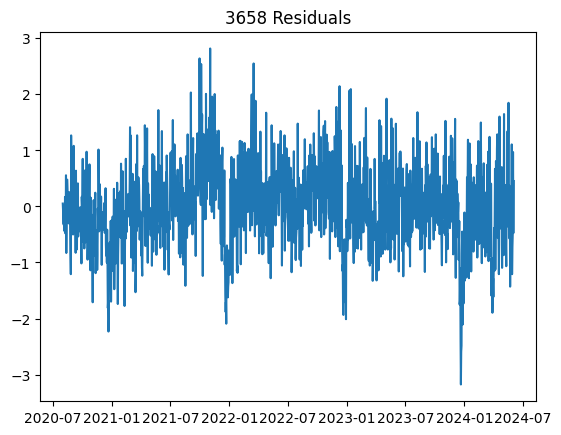

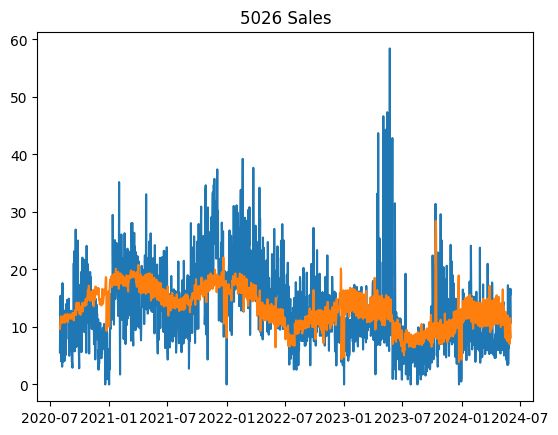

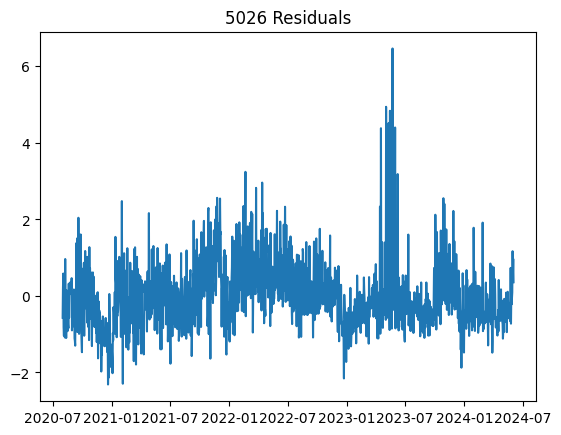

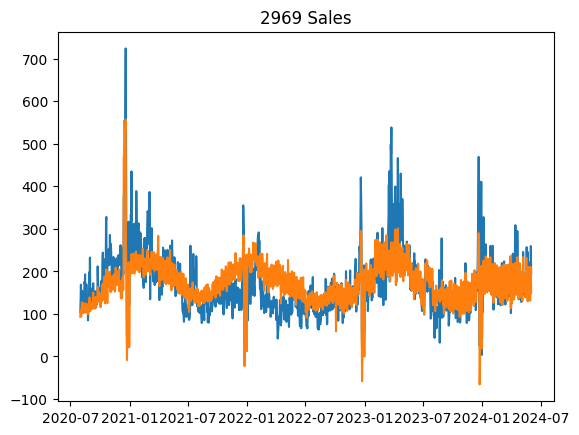

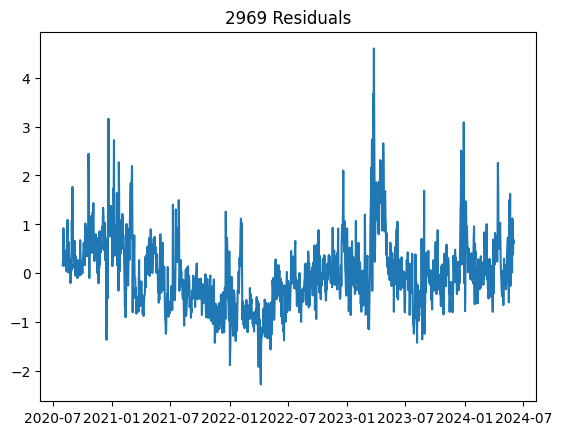

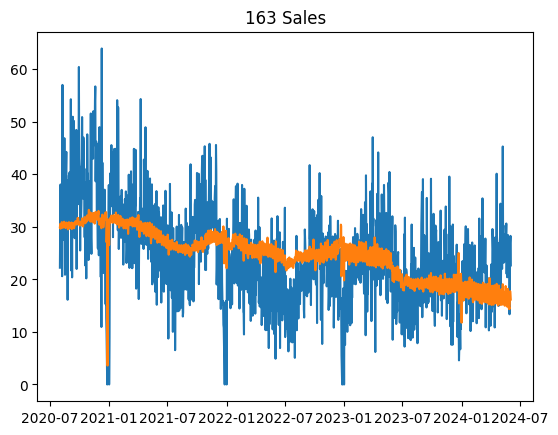

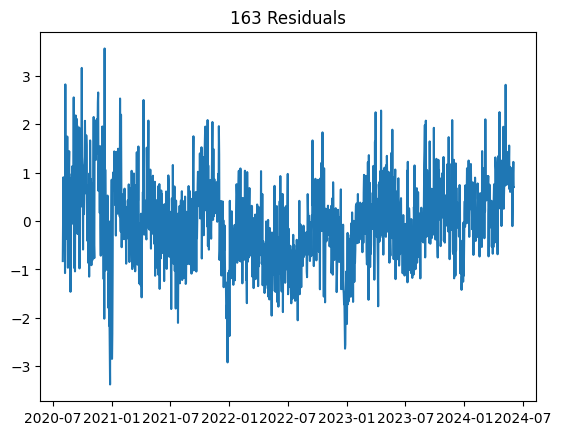

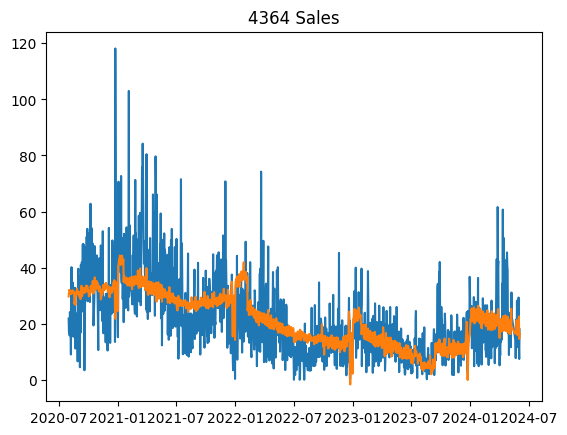

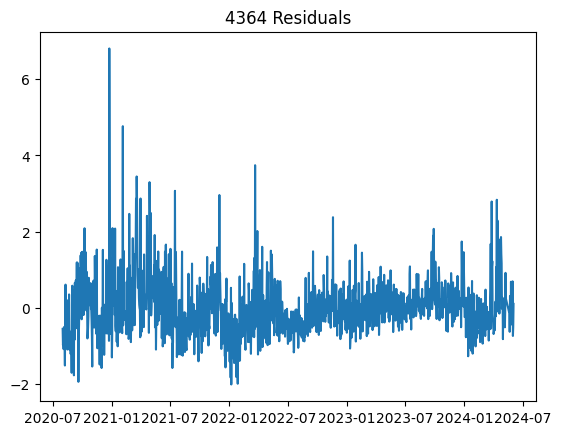

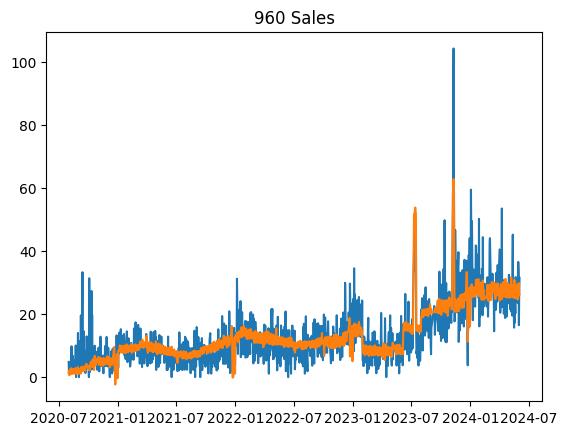

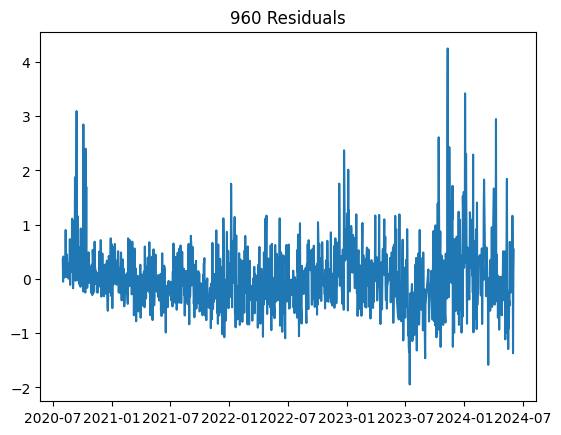

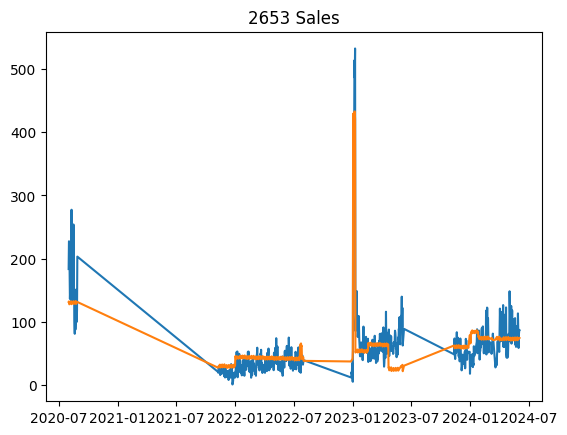

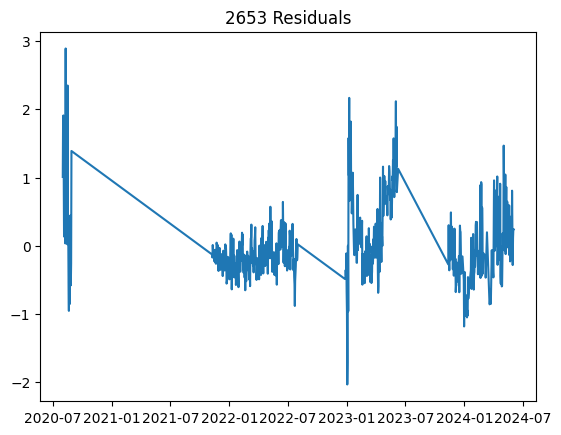

In [8]:
from sklearn.linear_model import LinearRegression
for id in unique_ids[:10]:
    df_id = df.loc[df['unique_id'] == id, [
        'date', 'sales', 'total_orders', 'sell_price_main', 'type_0_discount', 'type_1_discount', 
        'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount', 'rel_price',
        'weekday', 'month', 'top_discount']]
    X = df_id.drop('sales', axis=1)
    X['date'] = X['date'].astype(int) / 1e11
    X['date'] = X['date'] - X['date'].min()
    y = df_id['sales']
    model = LinearRegression().fit(X, y)
    plt.plot(df_id['date'], df_id['sales'])
    plt.plot(df_id['date'], model.predict(X))
    plt.title(f'{id} Sales')
    plt.show()
    plt.plot(df_id['date'], (df_id['sales'] - model.predict(X)) / df_id['sales'].std())
    plt.title(f'{id} Residuals')
    plt.show()

## Adding Seasonality
Let's start by throwing everything we have at the model. Then, we can look at the residuals for seasonality. We have weekday flags (these 6 will do a better job at tracking complex changes than any 6 sinusoidal waves could at the week level). So, we'll be mostly interested in quarterly/yearly seasonality. Monthly seasonality *should* be tracked by the lags, which can go up to 31 days, assuming they are statistically significant.

In [18]:
df_cols = list(df.columns.drop(['country']))
print(df_cols)

['unique_id', 'date', 'warehouse', 'total_orders', 'sales', 'sell_price_main', 'type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount', 'top_discount']


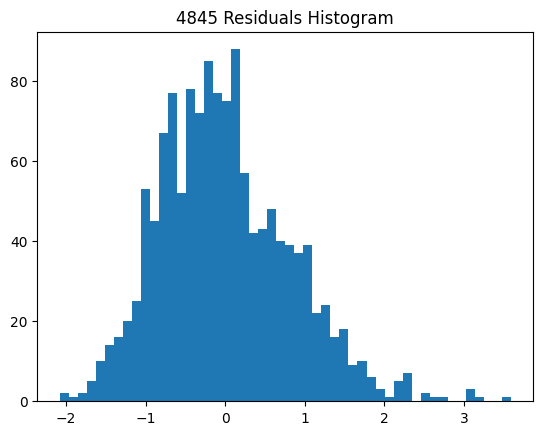

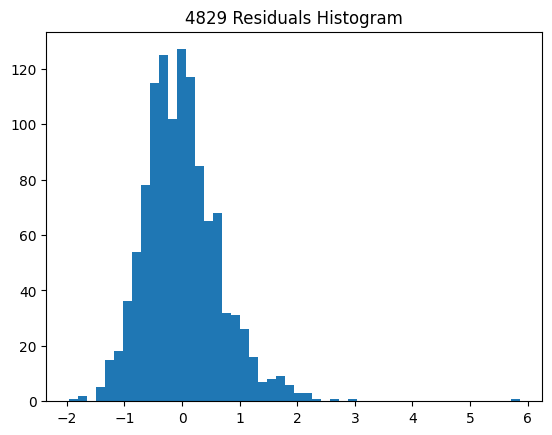

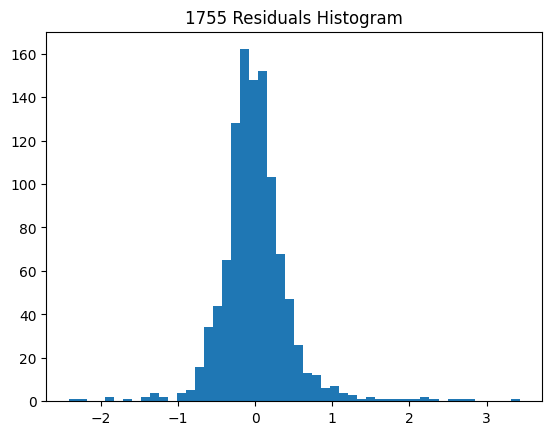

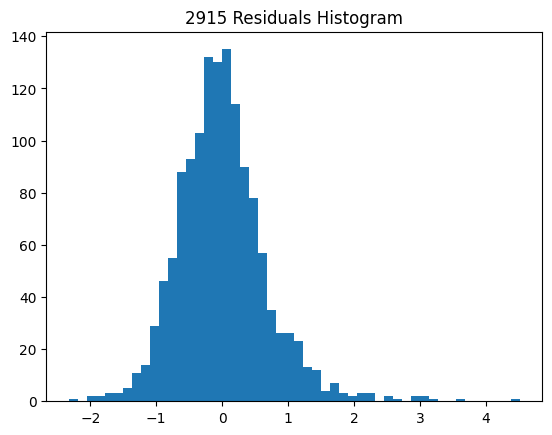

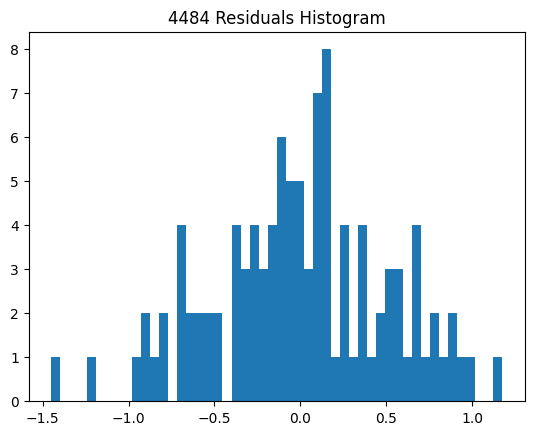

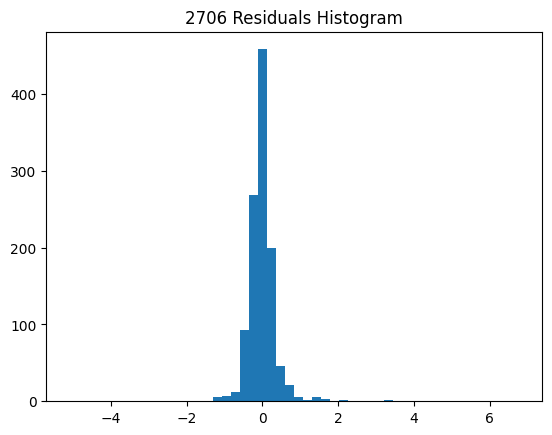

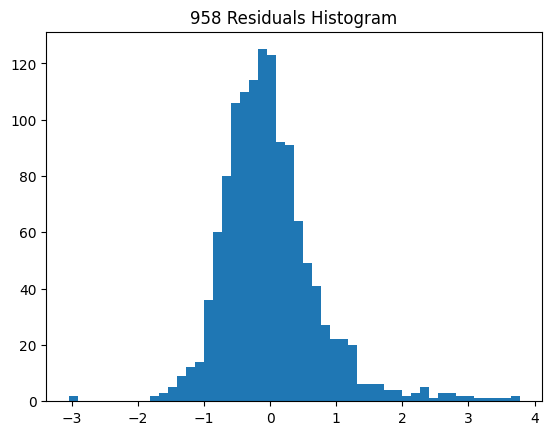

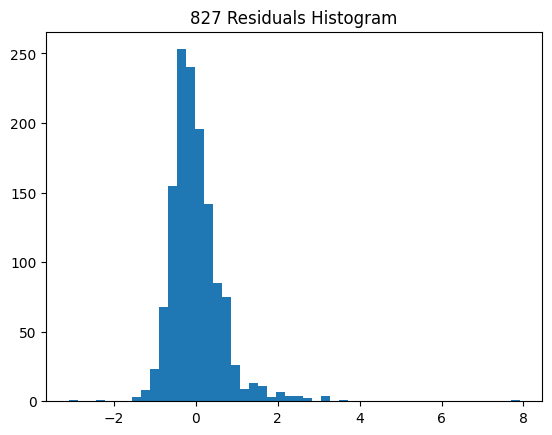

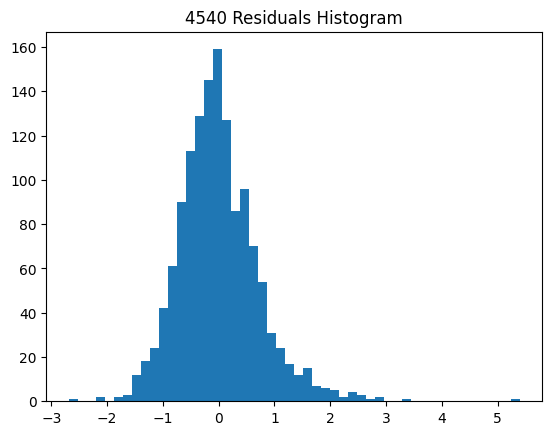

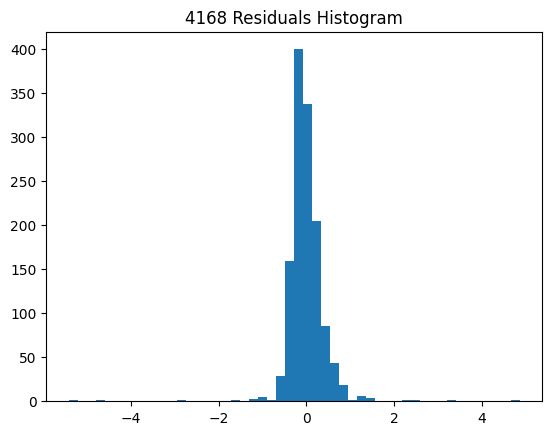

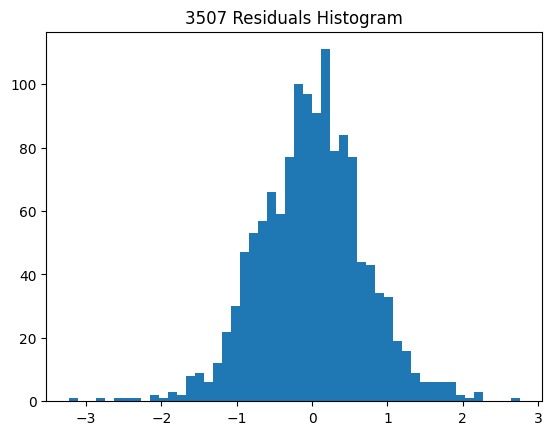

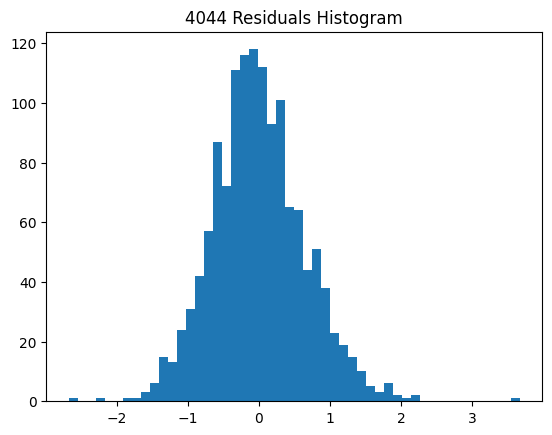

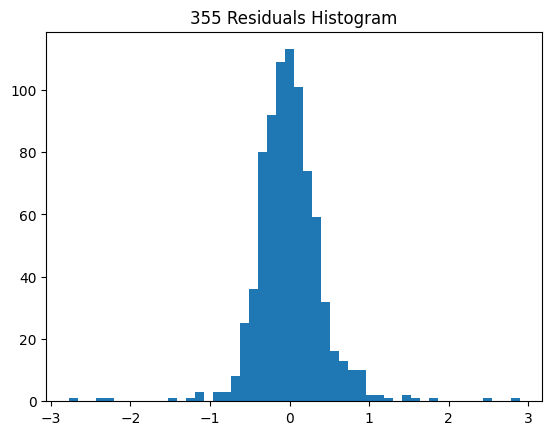

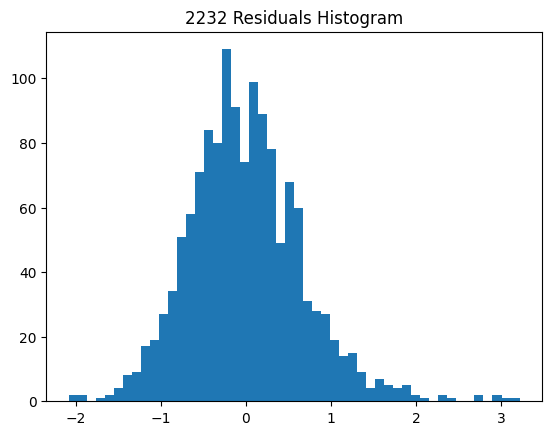

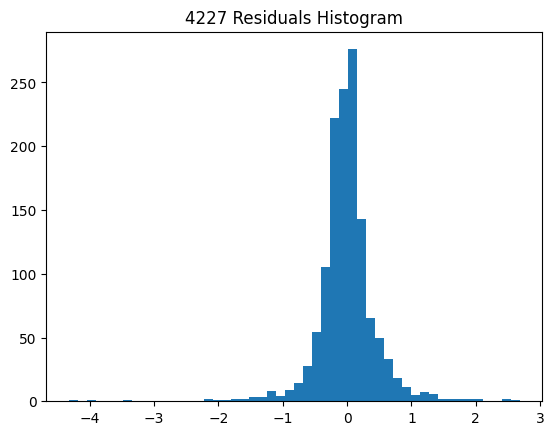

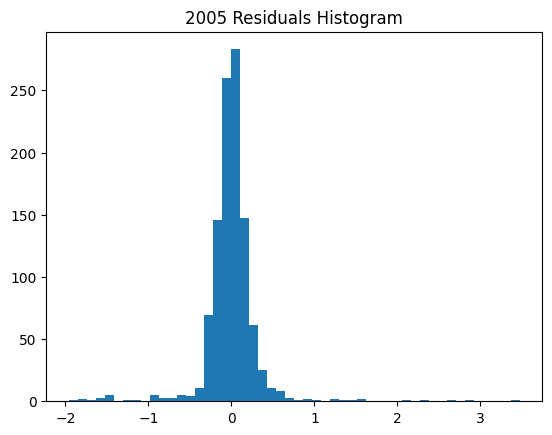

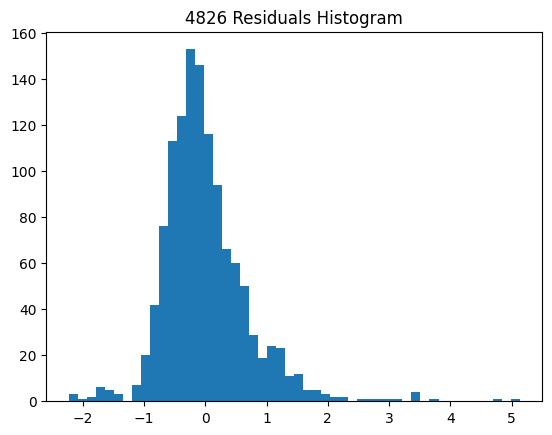

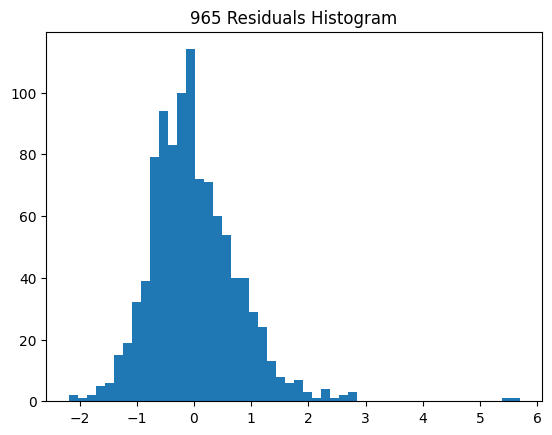

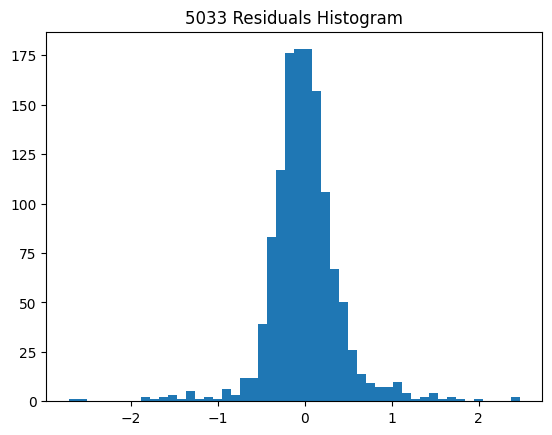

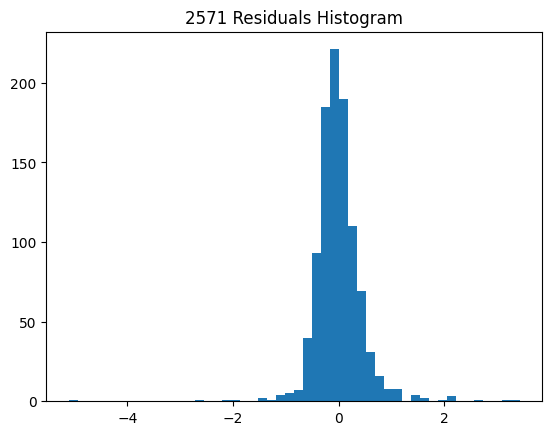

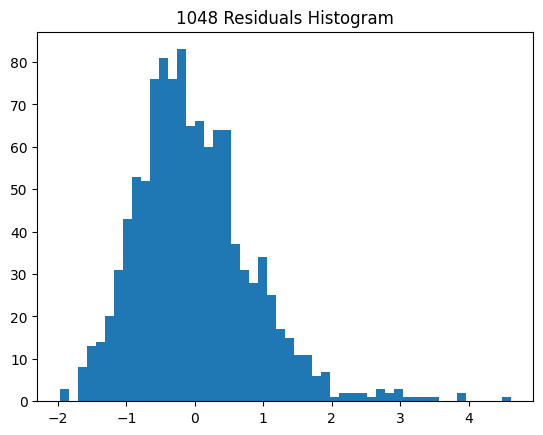

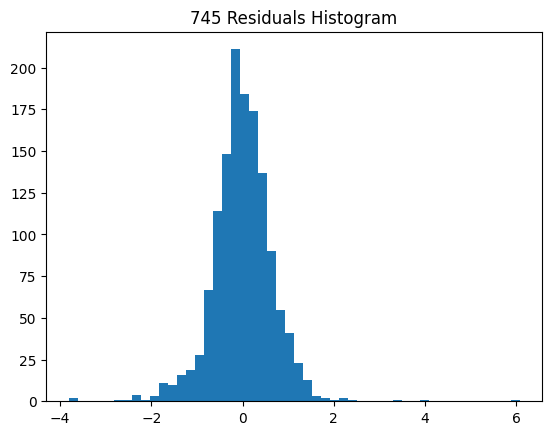

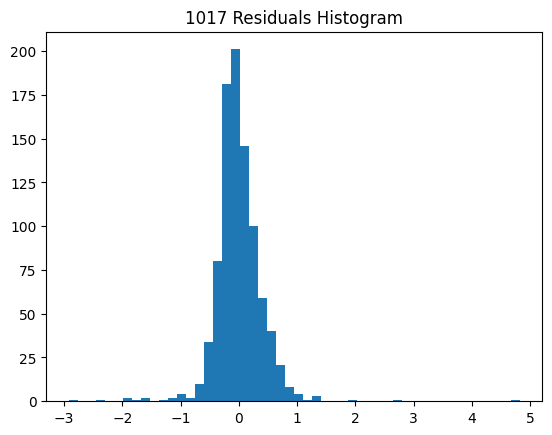

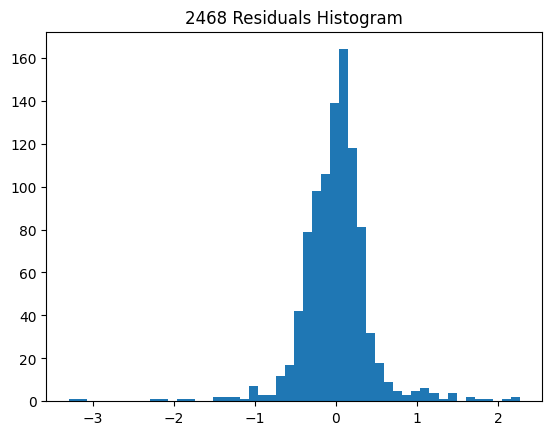

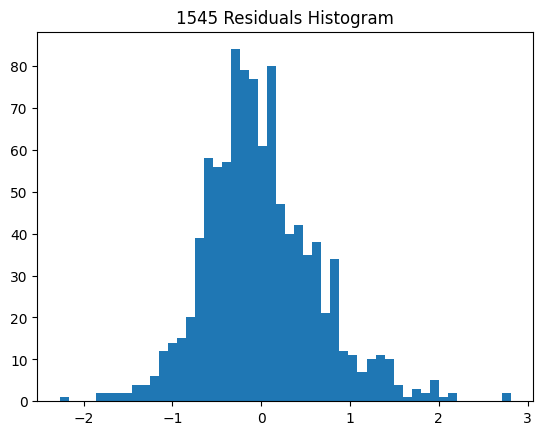

Average Size of Residuals (By StdDev): 0.4316


In [29]:
shortlist = stationary_ids[:25]
total_residuals = 0
num_residuals = 0
for id in shortlist:
    df_id = df.loc[df['unique_id'] == id, df_cols]

    # weighted moving weekly average
    df_id[f'wma_7'] = df_id['sales'].shift(1).rolling(7).apply(lambda x: np.dot(x, np.arange(1, 8)) / 28)
    df_id.dropna(inplace=True)

    # create lags
    lags = sig_lags_dict[id]
    for lag in lags:
        df_id[f'lag_{lag}'] = df_id['sales'].shift(lag)
    df_id = df_id.dropna()

    # warehouse-based calendar join
    house = df_id.loc[df_id.index[0], 'warehouse']
    df_id = df_id.drop('warehouse', axis=1) # constant across df_id
    cal_house = cal.loc[cal['warehouse'] == house].drop('warehouse', axis=1)
    combined = df_id.merge(cal_house, how='left', on='date')

    # create holiday and weekday flags
    X = pd.concat([combined.drop('holiday_name', axis=1),
                   pd.get_dummies(combined['holiday_name']).drop('No Holiday', axis=1).astype(int)],
                   axis=1)
    X['weekday'] = [day.weekday() for day in X['date']]
    X = pd.concat([X.drop('weekday', axis=1),
                   pd.get_dummies(X['weekday'], prefix='Weekday').drop('Weekday_0', axis=1).astype(int)],
                   axis=1)
    X = df_id.drop('sales', axis=1)
    X['date'] = X['date'].astype(int) / 1e11
    X['date'] = X['date'] - X['date'].min()
    y = df_id['sales']
    model = LinearRegression().fit(X, y)
    residuals = (df_id['sales'] -
                 model.predict(X)) / df_id['sales'].std()
    #plt.plot(df_id['date'], residuals)
    #plt.title(f'{id} Residuals')
    #plt.show()
    plt.hist(residuals, bins=50)
    plt.title(f'{id} Residuals Histogram')
    plt.show()
    total_residuals += residuals.apply(np.abs).sum()
    num_residuals += len(residuals)
print(f'Average Size of Residuals (By StdDev): {total_residuals / num_residuals:.4f}')

## Quickie Test Predictions

In [1]:
import pandas as pd
import numpy as np
import utils as u
train = u.get_train()
test = u.get_test()
test.describe()

,unique_id,date,total_orders,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,top_discount,discount_price,holiday,shops_closed,winter_school_holidays,school_holidays,events,product_unique_id,rel_price
count,329147.000000,329147,329147.000000,329147.000000,329147.000000,329147.000000,329147.000000,329147.0,329147.000000,329147.000000,329147.000000,329147.000000,329147.000000,329147.0,329147.0,329147.0,329147.0,329147.0,329147.000000,328559.000000
mean,2749.678016,2024-06-09 10:44:44.400586752,6880.911337,206.350987,0.013532,0.000251,0.004904,0.0,0.007142,0.000483,0.008359,0.033794,198.584617,0.0,0.0,0.0,0.0,0.0,1361.534166,-0.390009
min,1.000000,2024-06-03 00:00:00,1189.000000,0.130000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.130000,0.0,0.0,0.0,0.0,0.0,1.000000,-1.500000
25%,1417.000000,2024-06-06 00:00:00,5390.000000,20.110000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,19.050000,0.0,0.0,0.0,0.0,0.0,723.000000,-0.725278
50%,2767.000000,2024-06-09 00:00:00,6382.000000,49.040000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,46.690000,0.0,0.0,0.0,0.0,0.0,1369.000000,-0.215360
75%,4076.000000,2024-06-13 00:00:00,8919.000000,120.580000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,116.590000,0.0,0.0,0.0,0.0,0.0,2003.000000,0.000000
max,5431.000000,2024-06-16 00:00:00,12374.000000,11084.520000,0.885580,0.201000,0.500630,0.0,0.357700,0.357650,0.900000,0.900000,11084.520000,0.0,0.0,0.0,0.0,0.0,2669.000000,0.000000
std,1551.474578,NaN,2525.015292,525.123399,0.059923,0.007095,0.028592,0.0,0.032099,0.010956,0.043834,0.080734,506.104503,0.0,0.0,0.0,0.0,0.0,755.724047,0.447293


In [2]:
drop_cols = ['product_unique_id', 'name', 'L1_category_name_en',
             'L2_category_name_en', 'L3_category_name_en', 'L4_category_name_en',
             'warehouse', 'country', 'city', 'holiday_name']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)

In [3]:
cat_cols = test.select_dtypes(exclude='number').columns
print(test.columns)
print(cat_cols)

Index(['unique_id', 'date', 'total_orders', 'sell_price_main',
       'type_0_discount', 'type_1_discount', 'type_2_discount',
       'type_3_discount', 'type_4_discount', 'type_5_discount',
       'type_6_discount', 'weekday', 'month', 'top_discount', 'discount_price',
       'holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'events', 'rel_price'],
      dtype='object')
Index(['date', 'weekday', 'month'], dtype='object')


In [4]:
# fix date
train['date'] = train['date'].astype(int) / 864e11
test['date'] = test['date'].astype(int) / 864e11

min_date = train['date'].min()

train['date'] = train['date'] - min_date
test['date'] = test['date'] - min_date

In [13]:
train = pd.concat([train.drop('weekday', axis=1),
                   pd.get_dummies(train['weekday'], prefix='wk').drop('wk_0', axis=1).astype(int)],
                  axis=1)
test = pd.concat([test.drop('weekday', axis=1),
                  pd.get_dummies(test['weekday'], prefix='wk').drop('wk_0', axis=1).astype(int)],
                 axis=1)

train = pd.concat([train.drop('month', axis=1),
                   pd.get_dummies(train['month'], prefix='mn').drop('mn_6', axis=1).astype(int)],
                  axis=1)
test = pd.concat([test.drop('month', axis=1),
                  pd.get_dummies(test['month'], prefix='mn').drop('mn_6', axis=1).astype(int)],
                 axis=1)

train = train.drop_duplicates()


test = test.drop_duplicates()

train_cols = train.columns.to_list()
train_cols.remove('sales')
test_cols = test.columns.to_list()
for col in train_cols:
    if col not in test_cols:
        test[col] = 0

In [ ]:
test_ids = test['unique_id'].unique().tolist()
csv_dict = {}

from tqdm import tqdm

from sklearn.linear_model import LinearRegression


def to_date(x):

    rescale = (x + min_date) * 864e11

    return pd.to_datetime(int(rescale)).date()


weights = pd.read_csv('./data/test_weights.csv')

weights = weights.set_index('unique_id').to_dict()['weight']

indices = test_ids.copy()

may1 = pd.to_datetime(pd.Series(['05-01-2024'])).astype(int) / 864e11

may1 = int(may1.loc[0] - min_date)


for id in tqdm(indices):

    test_id = test.loc[test['unique_id'] == id]

    train_id = train.loc[train['unique_id'] == id]

    dates = test_id['date'].apply(to_date).astype(str).to_list()

    if len(train_id) < 50:

        may = train_id.loc[train_id['date'] > may1, 'sales']

        if len(may) > 0:

            mean = may.mean()

        else:
            mean = train_id['sales'].mean()

        for date in dates:

            csv_dict[f'{id}_{date}'] = mean / weights[id]

        test_ids.remove(id)

        continue


    model = LinearRegression().fit(train_id.drop('sales', axis=1), train_id['sales'])
    preds = model.predict(test_id)

    for pred, date in zip(preds, dates):

        csv_dict[f'{id}_{date}'] = pred / weights[id]

    test_ids.remove(id)

100%|██████████| 3625/3625 [06:00<00:00, 10.05it/s]


In [73]:
submission = pd.DataFrame(list(csv_dict.items()), columns=['id','sales_hat'])
submission.to_csv('submission.csv', index=False)

In [ ]:
from preprocessing import Submitter
sub = Submitter()

Trend Fitting... Day 1


  0%|          | 0/3550 [00:00<?, ?it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


In [3]:
import gc
gc.collect()
params = {
    'learning_rate': 0.025, #0.025,
    'num_leaves': 50, #100, #150
    'min_child_samples': 25,
    'subsample': 0.7,
    'colsample_bytree': 0.8528497905459008,
    'reg_lambda': 0.3151110021900479,
    'num_boost_round': 7000,
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt'
}
sub.build_and_submit(params=params)

c:\Users\ttfee\OneDrive\Desktop\Rohlik Sales Forecasting\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.448732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22497
[LightGBM] [Info] Number of data points in the train set: 3477126, number of used features: 108
[LightGBM] [Info] Start training from score 73.126380
[200]	train's l1: 18.4824
[400]	train's l1: 17.2685
[600]	train's l1: 16.7261
[800]	train's l1: 16.3565
[1000]	train's l1: 16.0737
[1200]	train's l1: 15.8226
[1400]	train's l1: 15.5965
[1600]	train's l1: 15.4047
[1800]	train's l1: 15.2289
[2000]	train's l1: 15.0558
[2200]	train's l1: 14.9049
[2400]	train's l1: 14.7643
[2600]	train's l1: 14.6294
[2800]	train's l1: 14.5064
[3000]	train's l1: 14.3853
[3200]	train's l1: 14

In [9]:
import pandas as pd
df = pd.read_csv('./data/sales_train.csv')

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

# Calculate monthly averages per product
monthly_avg = (
    df.groupby(['unique_id', 'month'])['sales']
    .mean()
    .groupby('unique_id')
    .shift(1)
    .reset_index()
    .rename(columns={'sales': 'prev_month_avg'})
)

# Merge the previous month averages back to the original dataframe
df['month'] = df['date'].dt.to_period('M')
df = df.merge(monthly_avg, on=['unique_id', 'month'], how='left')

# Drop the temporary 'month' column
# df.drop(columns=['month'], inplace=True)

print(df[['prev_month_avg', 'sales', 'month']])
id = 4801
print(df.loc[(df['unique_id'] == id) & (df['month'] == '2024-03'), 'prev_month_avg'])
print(df.loc[(df['unique_id'] == id) & (df['month'] == '2024-02'), 'sales'].mean())

         prev_month_avg  sales    month
0             27.800000  16.34  2024-03
1             13.672667  12.63  2021-05
2             21.785333  34.55  2021-12
3             16.906129  34.52  2023-04
4             31.766129  35.92  2022-04
...                 ...    ...      ...
4007414             NaN  26.56  2023-06
4007415             NaN  27.42  2023-06
4007416             NaN  33.39  2023-06
4007417             NaN  22.88  2023-06
4007418             NaN  32.10  2023-06

[4007419 rows x 3 columns]
239367    73.812414
239380    73.812414
239390    73.812414
239510    73.812414
239535    73.812414
239539    73.812414
239598    73.812414
239648    73.812414
239719    73.812414
239750    73.812414
239755    73.812414
239760    73.812414
239811    73.812414
239930    73.812414
239960    73.812414
239964    73.812414
240027    73.812414
240200    73.812414
240202    73.812414
240290    73.812414
240308    73.812414
240411    73.812414
240441    73.812414
240456    73.812414
240472    73

In [4]:
from collections import defaultdict

# Extract model information
model_dump = sub.model.dump_model()
trees = model_dump['tree_info']

# Dictionary to store split bigrams
split_bigrams = defaultdict(int)

# Traverse each tree
for tree in trees:
    nodes = tree['tree_structure']

    # Recursive function to traverse nodes
    def traverse(node, parent_feature=None):
        if 'split_feature' in node:
            current_feature = node['split_feature']

            # If there's a parent split, record the bigram
            if parent_feature is not None:
                split_bigrams[(parent_feature, current_feature)] += 1

            # Traverse left and right child nodes
            traverse(node['left_child'], current_feature)
            traverse(node['right_child'], current_feature)

    # Start traversing the root node
    traverse(nodes)

# Convert bigrams to a sorted list
sorted_bigrams = sorted(split_bigrams.items(),
                        key=lambda x: x[1], reverse=True)

# Display top bigrams
for bigram, count in sorted_bigrams[:10]:
    print(f"Split Bigram: {bigram}, Count: {count}")

Split Bigram: (0, 0), Count: 11762
Split Bigram: (0, 4), Count: 2160
Split Bigram: (4, 0), Count: 1420
Split Bigram: (2, 0), Count: 1204
Split Bigram: (21, 0), Count: 1187
Split Bigram: (0, 24), Count: 1105
Split Bigram: (0, 2), Count: 1064
Split Bigram: (0, 21), Count: 967
Split Bigram: (68, 0), Count: 957
Split Bigram: (23, 0), Count: 745


In [14]:
import numpy as np
cols = sub.train.drop(['sales', 'date', 'weight'], axis=1).columns.to_list()

n_splits = sub.model.feature_importance(importance_type='split').tolist()

surprise = {}

for bigram, count in sorted_bigrams:
    p, c = bigram
    surprise[bigram] = count**2 / n_splits[p] * n_splits[c]

sorted_surprise = sorted(surprise.items(),
                         key=lambda x: x[1], reverse=True)

for bigram, freq in sorted_surprise[:100]:
    p, c = bigram
    print(f"{cols[p]:30} {cols[c]}")

NameError: name 'sorted_bigrams' is not defined